<a href="https://colab.research.google.com/github/BettinaGeorge/KPMG-Productivity-Energy-Trade-off-Optimizer-Project-Break-Through-Tech-AI-/blob/main/KPMG_1E_Coding_File_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KPMG 1E AI Studio Project
- Project Name: Product Energy Tradeoff Optimizer
- Group Members: Bettina George, Diana Medina, Ei Pang Pang Htwe, Jasper Li, Shreya Venkateswaran, Ryan Vaseem, Kimberly Hernandez
- AI Studio Coach: Dr. Uohna Thiessen
- Challenge Advisors: Kathi Ray (Director), Sharad Nagariya (Director), Ryan Tuggle (Director), Nainika Narayanan (Associate), Brooke Bernstein (Associate),

# Part 1: Data Preparation, EDA, and Statistical Summaries

## Upload Dataset and Clean Missing Values

In [ ]:
# KPMG 1E AI Studio Project
# Project Name: Product Energy Tradeoff Optimizer

import pandas as pd # import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, classification_report
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import TweedieRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import median_absolute_error

from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor



In [ ]:
!pip -q install pymoo==0.6.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.6 MB/s eta 0:00:00


In [ ]:

from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.sampling.rnd import IntegerRandomSampling
from pymoo.operators.crossover.pntx import TwoPointCrossover
from pymoo.operators.mutation.pm import PolynomialMutation
from pymoo.optimize import minimize


from sklearn.metrics import explained_variance_score
from scipy.stats import pearsonr
from sklearn.model_selection import KFold, cross_val_predict

In [ ]:
# Add dataset files to drive mount
fed_df = pd.read_excel("/content/fed_reserve_time_saved.xlsx")
claude_df = pd.read_excel("/content/Claude_AI_Work_Usage.xlsx")
energy_df = pd.read_excel("/content/AI_Energy_Benchmark.xlsx")

# Display first few rows
print("Fed Reserve Time Saved:\n", fed_df.head(), "\n")
print("Claude AI Work Usage:\n", claude_df.head(), "\n")
print("AI Energy Benchmark:\n", energy_df.head(), "\n")


Fed Reserve Time Saved:
   frequency/intensity  Average time saved with AI
0                high                       120.0
1                high                       120.0
2                high                       120.0
3                high                       120.0
4                high                       120.0 

Claude AI Work Usage:
                              Occupation  Percent of U.S. Workers Using Claude  \
0     Office and Administrative Support                                 0.079   
1    Transportation and Material Moving                                 0.003   
2                     Saled and Related                                 0.023   
3  Food Preparation and Serving Related                                 0.005   
4                    General Management                                 0.045   

   Percent of Claude User Conversations  \
0                                 0.122   
1                                 0.091   
2                                 

In [ ]:
import io, textwrap

def print_df_info(df, name):
    buf = io.StringIO()
    print(f"\n{name}:", file=buf)
    df.info(buf=buf)
    print(textwrap.dedent(buf.getvalue()))

print_df_info(fed_df,   "Time Saved with AI (Fed study)")
print_df_info(claude_df,"Claude AI Work Usage")
print_df_info(energy_df,"AI Energy Benchmark")


Time Saved with AI (Fed study):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92926 entries, 0 to 92925
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   frequency/intensity         92926 non-null  object 
 1   Average time saved with AI  92926 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


Claude AI Work Usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Occupation                            22 non-null     object 
 1   Percent of U.S. Workers Using Claude  22 non-null     float64
 2   Percent of Claude User Conversations  22 non-null     float64
 3   Industry                              18 non-null     object 
 4   Job Role                              18 non-n

In [ ]:
# Shape (rows, columns)
print("Claude Dataset shape:", claude_df.shape)
print("Energy Dataset shape:", energy_df.shape)
print("AI Productivity Dataset shape:", fed_df.shape)

# Column names
print("Columns: Claude Dataset \n", claude_df.columns.tolist())
print("Columns: Energy Dataset \n", energy_df.columns.tolist())
print("Columns: AI Productivity \n", fed_df.columns.tolist())

# Data types
print("\nData types: Claude Dataset \n", claude_df.dtypes)
print("\nData types: Energy Dataset \n", energy_df.dtypes)
print("\nData types: AI Productivity \n", fed_df.dtypes)

# Find Missing values
print("\nMissing values per column: Claude Dataset \n", claude_df.isnull().sum())
print("\nMissing values per column: Energy Dataset \n", energy_df.isnull().sum())
print("\nMissing values per column: AI Productivity \n", fed_df.isnull().sum())


Claude Dataset shape: (22, 8)
Energy Dataset shape: (28, 7)
AI Productivity Dataset shape: (92926, 2)
Columns: Claude Dataset 
 ['Occupation', 'Percent of U.S. Workers Using Claude', 'Percent of Claude User Conversations', 'Industry', 'Job Role', 'Work Usage of Claude ', 'Top Tasks ', 'Top Task Allocation']
Columns: Energy Dataset 
 ['AI Model', 'Low Mean Energy Consumption (100 input - 300 output) (Wh)', 'Low Std Dev Energy Consumption (100 input - 300 output) (Wh)', 'Medium Mean Energy Consumption (1k input - 1k output) (Wh)', 'Medium Std Dev Energy Consumption (1k input - 1k output) (Wh)', 'High Mean Energy Consumption (10k input - 1.5k output) (Wh)', 'High Std Dev Energy Consumption (10k input - 1.5k output) (Wh)']
Columns: AI Productivity 
 ['frequency/intensity', 'Average time saved with AI']

Data types: Claude Dataset 
 Occupation                               object
Percent of U.S. Workers Using Claude    float64
Percent of Claude User Conversations    float64
Industry        

In [ ]:
# Clean missing values in datasets and Rename columns as needed

# Drop null values
fed_df = fed_df.dropna()
claude_df = claude_df.dropna()
energy_df = energy_df.dropna()

# print cleaning results
print("After Cleaning:")
print(f"Fed Reserve rows: {fed_df.shape[0]}, remaining nulls: {fed_df.isnull().sum().sum()}")
print(f"Claude AI rows: {claude_df.shape[0]}, remaining nulls: {claude_df.isnull().sum().sum()}")
print(f"Energy Benchmark rows: {energy_df.shape[0]}, remaining nulls: {energy_df.isnull().sum().sum()}\n")



claude_df = claude_df.rename(columns={
    "Occupation": "Occupation",
    "Percent of U.S. Workers Using Claude": "Percent_Workers_Using_Claude",
    "Percent of Claude User Conversations": "Percent_Claude_User_Conversations",
    "Work Dependency (L/H)": "Work_Dependency",
    "Industry": "Industry",
    "Job Role": "Job_Role",
    "Work Usage of Claude (August '24)": "Work_Usage_of_Claude",
    "Top Tasks": "Top_Tasks", # rename columns to simplify
    "Task Category": "Task_Category",
    "Alloc % In Category": "Alloc_Pct_In_Category",
    "Sub-Activities": "Sub_Activities",
    "Alloc % In Activity": "Alloc_Pct_In_Activity"
})

print("All missing/null values removed successfully!")


After Cleaning:
Fed Reserve rows: 92926, remaining nulls: 0
Claude AI rows: 18, remaining nulls: 0
Energy Benchmark rows: 25, remaining nulls: 0

All missing/null values removed successfully!


## Univariate Analysis

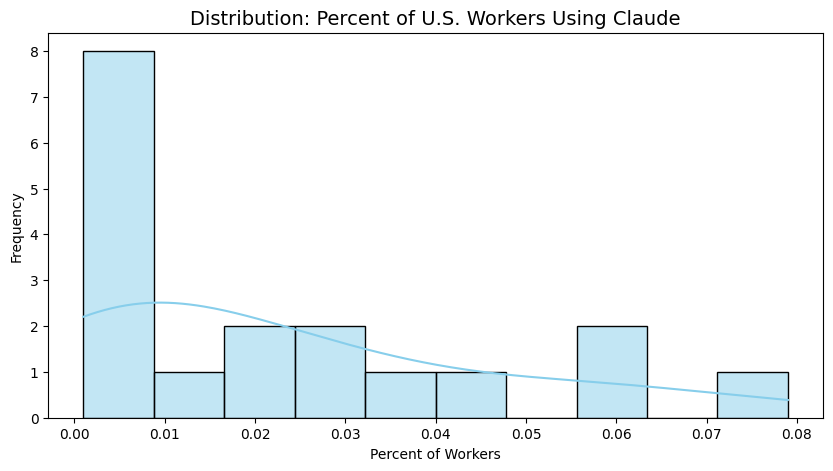

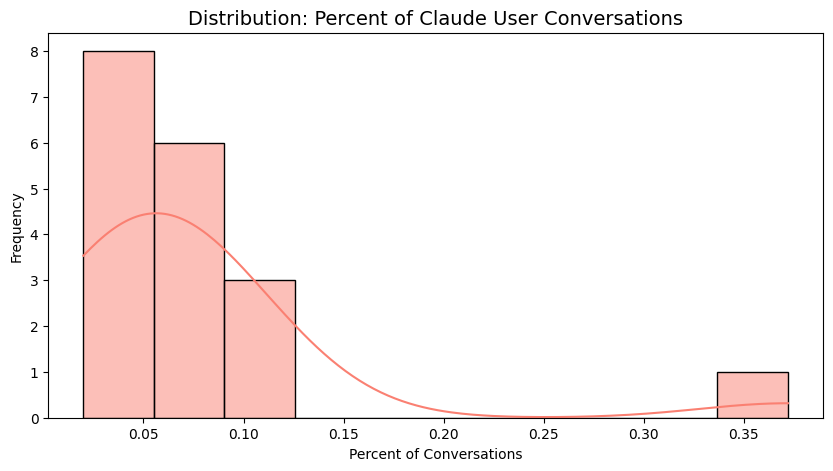

In [ ]:
# Univariate analysis

# Visualization 1: Distribution of Claude Usage (% of Workers Using Claude)

plt.figure(figsize=(10,5))
sns.histplot(claude_df["Percent_Workers_Using_Claude"], bins=10, kde=True, color="skyblue")
plt.title("Distribution: Percent of U.S. Workers Using Claude", fontsize=14)
plt.xlabel("Percent of Workers")
plt.ylabel("Frequency")
plt.show()

# Visualization 2: Distribution of Claude Conversations

plt.figure(figsize=(10,5))
sns.histplot(claude_df["Percent_Claude_User_Conversations"], bins=10, kde=True, color="salmon")
plt.title("Distribution: Percent of Claude User Conversations", fontsize=14)
plt.xlabel("Percent of Conversations")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Energy Visualizations -- AI Model Vs. Energy Data Groups (Low, Medium, and High)


# Low Mean Energy Consumption

fig_low = px.bar(
    energy_df.sort_values('Low Mean Energy Consumption (100 input - 300 output) (Wh)'),
    x='AI Model',
    y='Low Mean Energy Consumption (100 input - 300 output) (Wh)',
    title='Low Mean Energy Consumption per AI Model',
    hover_data={
        'AI Model': True,
        'Low Mean Energy Consumption (100 input - 300 output) (Wh)': ':.2f'
    },
    color='Low Mean Energy Consumption (100 input - 300 output) (Wh)',
    color_continuous_scale='Blues'
)
fig_low.update_layout(
    xaxis_title='AI Model',
    yaxis_title='Energy (Wh)',
    showlegend=False
)
fig_low.show()

# Medium Mean Energy Consumption
fig_med = px.bar(
    energy_df.sort_values('Medium Mean Energy Consumption (1k input - 1k output) (Wh)'),
    x='AI Model',
    y='Medium Mean Energy Consumption (1k input - 1k output) (Wh)',
    title='Medium Mean Energy Consumption per AI Model',
    hover_data={
        'AI Model': True,
        'Medium Mean Energy Consumption (1k input - 1k output) (Wh)': ':.2f'
    },
    color='Medium Mean Energy Consumption (1k input - 1k output) (Wh)',
    color_continuous_scale='Greens'
)
fig_med.update_layout(
    xaxis_title='AI Model',
    yaxis_title='Energy (Wh)',
    showlegend=False
)
fig_med.show()

# High Mean Energy Consumption
fig_high = px.bar(
    energy_df.sort_values('High Mean Energy Consumption (10k input - 1.5k output) (Wh)'),
    x='AI Model',
    y='High Mean Energy Consumption (10k input - 1.5k output) (Wh)',
    title='High Mean Energy Consumption per AI Model',
    hover_data={
        'AI Model': True,
        'High Mean Energy Consumption (10k input - 1.5k output) (Wh)': ':.2f'
    },
    color='High Mean Energy Consumption (10k input - 1.5k output) (Wh)',
    color_continuous_scale='Oranges'
)
fig_high.update_layout(
    xaxis_title='AI Model',
    yaxis_title='Energy (Wh)',
    showlegend=False
)
fig_high.show()

## Bivariate Analysis

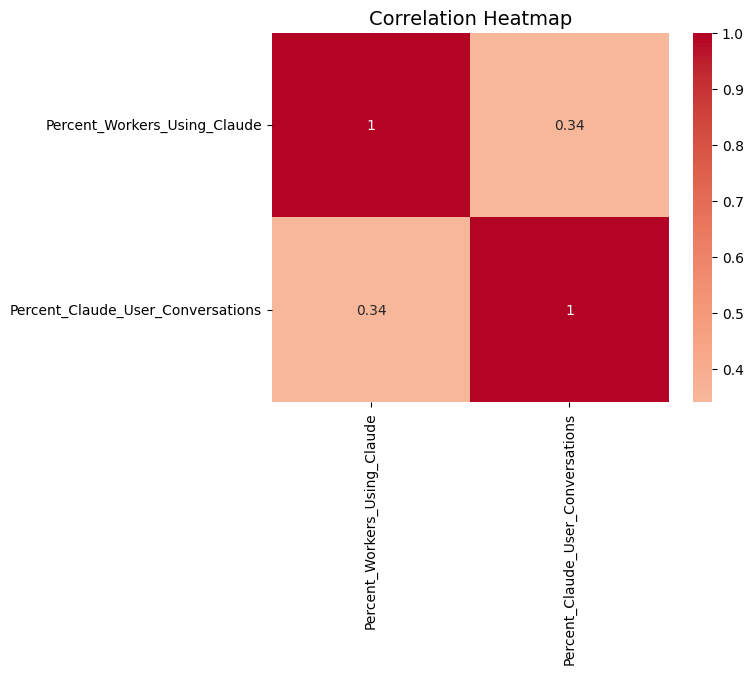

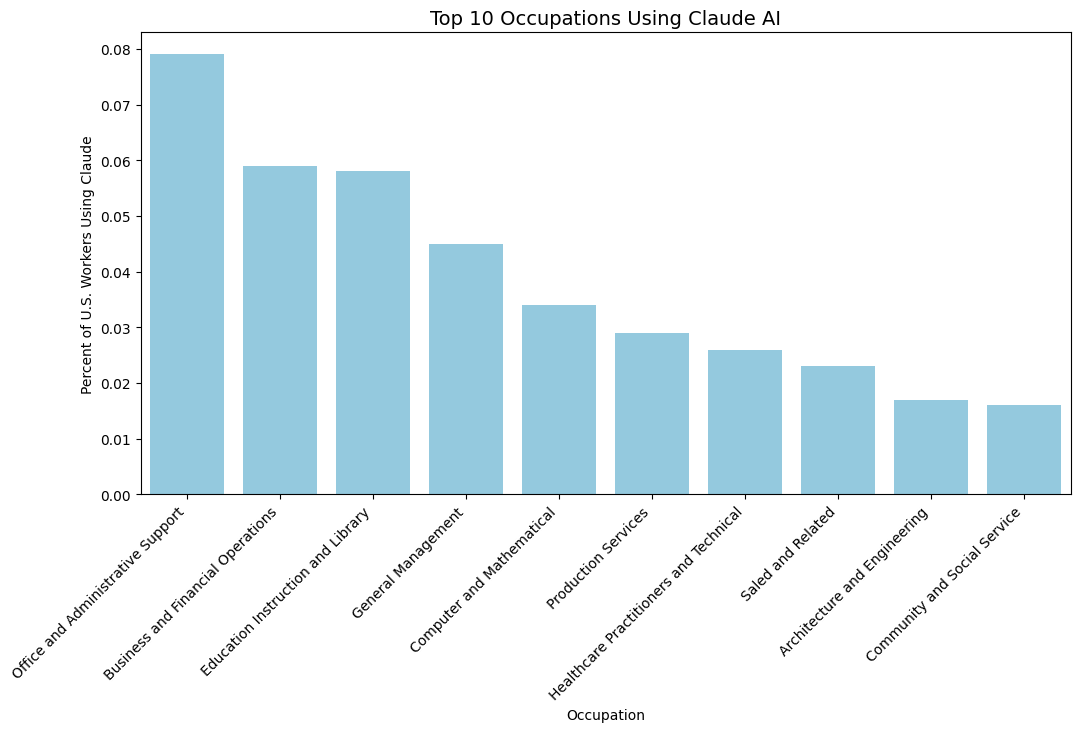

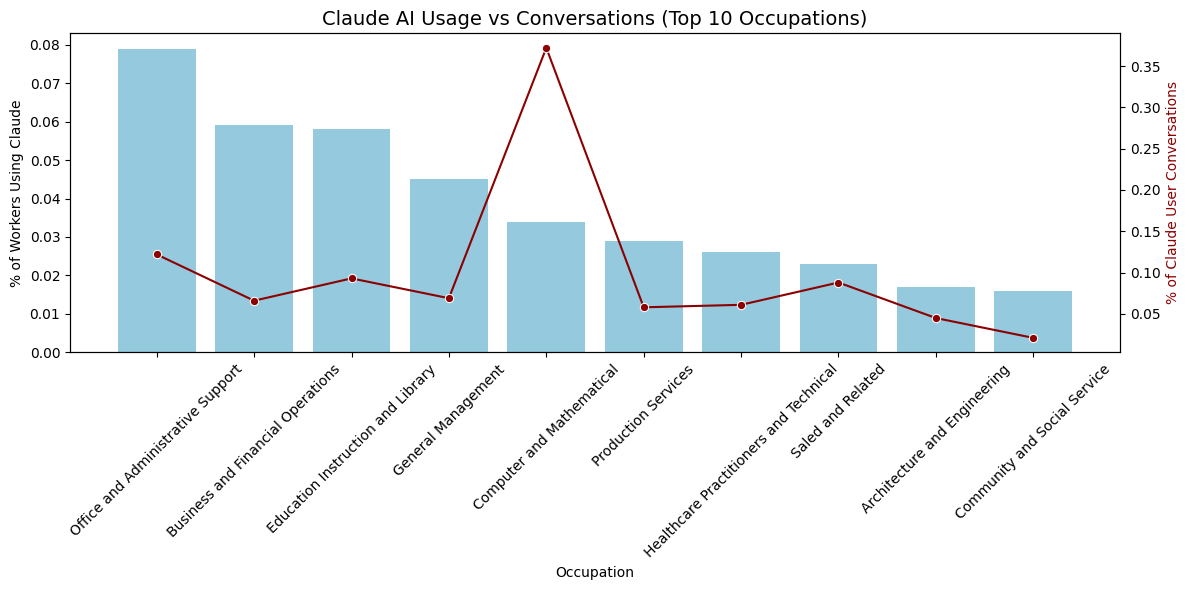

In [ ]:
# Bivariate Analysis

# Visualization 1: Correlation Between Workers Using Claude and Conversations

# Interpretation --> A high positive correlation (near 1) means occupations with higher adoption also generate more Claude conversations.

corr = claude_df[["Percent_Workers_Using_Claude", "Percent_Claude_User_Conversations"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# Visualization 2: Top 10 Occupations Using Claude

top10 = claude_df.nlargest(10, "Percent_Workers_Using_Claude")

plt.figure(figsize=(12,6))
sns.barplot(x="Occupation", y="Percent_Workers_Using_Claude", data=top10, color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Occupations Using Claude AI", fontsize=14)
plt.ylabel("Percent of U.S. Workers Using Claude")
plt.show()

# Visualization 3: Bar & Trend Line (Usage vs. Conversations)

fig, ax1 = plt.subplots(figsize=(12,6))

sns.barplot(
    x="Occupation",
    y="Percent_Workers_Using_Claude",
    data=top10,
    color="skyblue",
    ax=ax1
)
ax1.set_ylabel("% of Workers Using Claude")
ax1.tick_params(axis="x", rotation=45)
ax1.set_xlabel("Occupation")

ax2 = ax1.twinx()
sns.lineplot(
    x="Occupation",
    y="Percent_Claude_User_Conversations",
    data=top10,
    color="darkred",
    marker="o",
    ax=ax2
)
ax2.set_ylabel("% of Claude User Conversations", color="darkred")
plt.title("Claude AI Usage vs Conversations (Top 10 Occupations)", fontsize=14)
plt.tight_layout()
plt.show()



## Multivariate Analysis

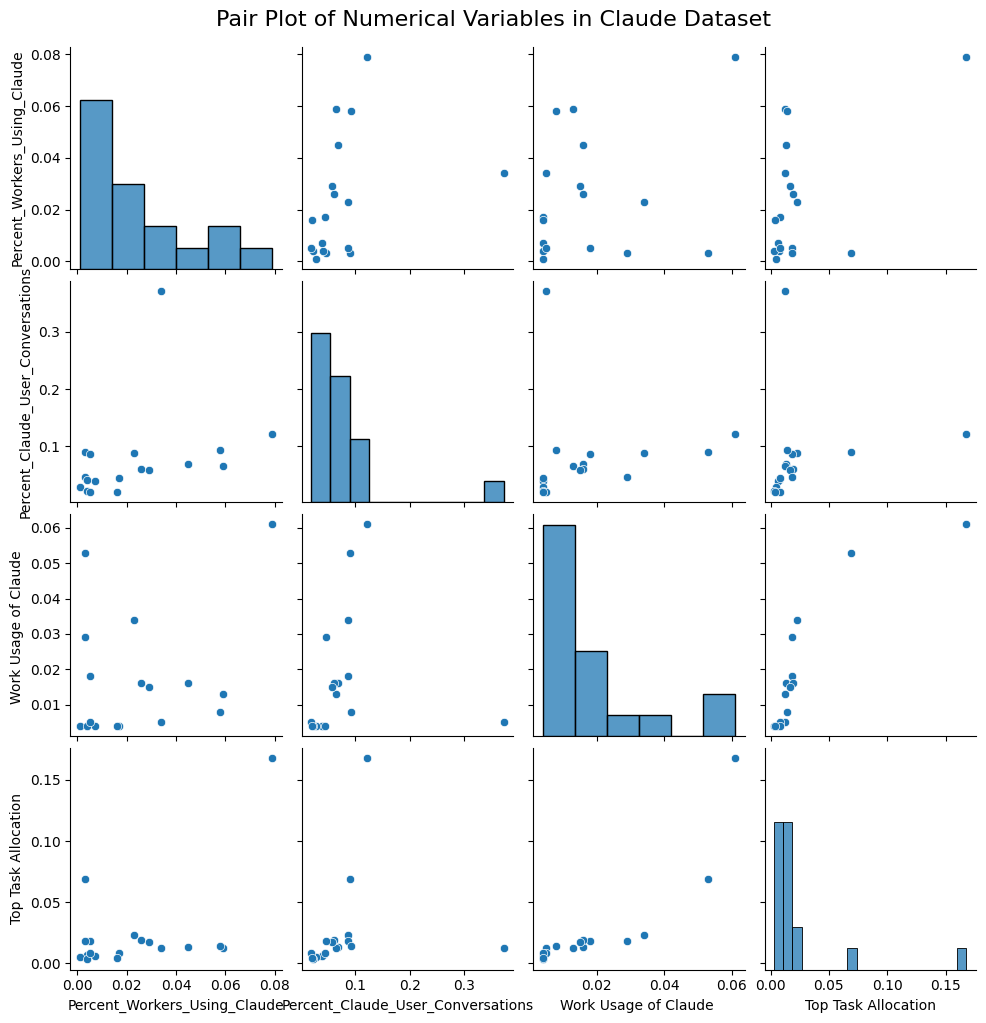

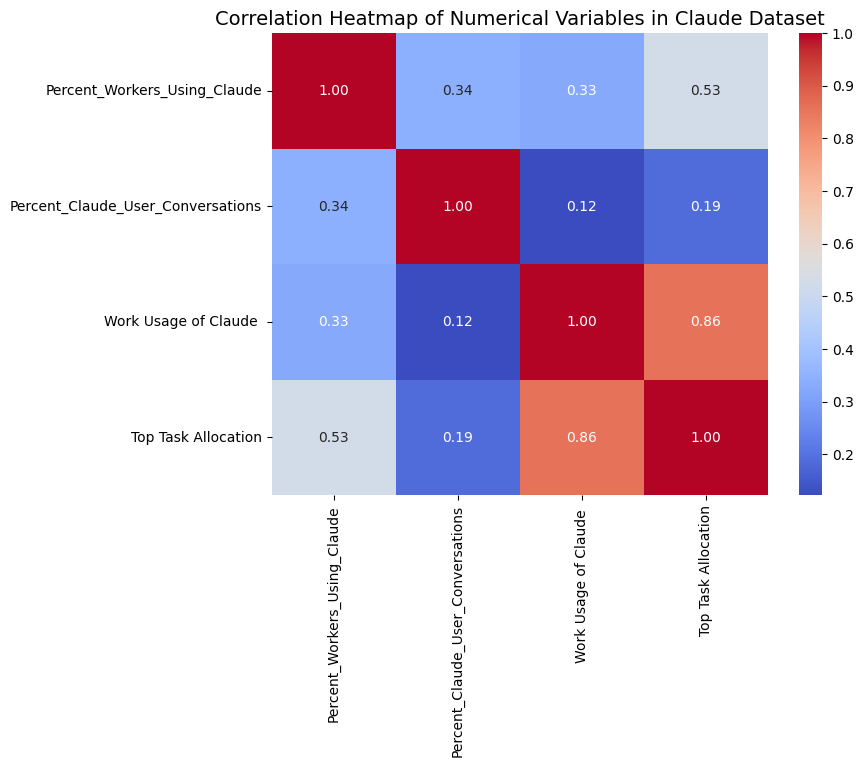

In [ ]:
# Multivariate Analysis - Claude Dataset

# Scatter plot matrix for numerical columns in claude_df
numerical_claude_cols = claude_df.select_dtypes(include=np.number).columns.tolist()
if numerical_claude_cols:
    fig = sns.pairplot(claude_df[numerical_claude_cols])
    fig.fig.suptitle("Pair Plot of Numerical Variables in Claude Dataset", y=1.02, fontsize=16)
    plt.show()
else:
    print("No numerical columns found in claude_df for pair plot.")

# Correlation heatmap for numerical columns in claude_df
if numerical_claude_cols:
    plt.figure(figsize=(8, 6))
    corr_matrix = claude_df[numerical_claude_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap of Numerical Variables in Claude Dataset", fontsize=14)
    plt.show()
else:
    print("No numerical columns found in claude_df for correlation heatmap.")

## Categorical Insights

/tmp/ipython-input-983954725.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




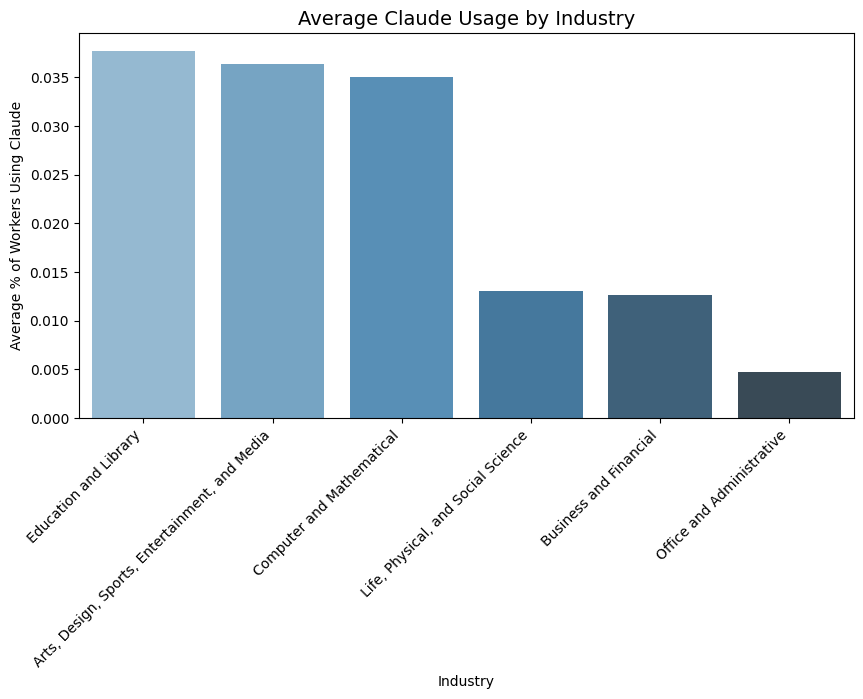

In [ ]:
# Categorical Insights

# Claude Dataset
# Average Usage of AI at Work by Industry

plt.figure(figsize=(10,5))
industry_usage = claude_df.groupby("Industry")["Percent_Workers_Using_Claude"].mean().sort_values(ascending=False)
sns.barplot(x=industry_usage.index, y=industry_usage.values, palette="Blues_d")
plt.xticks(rotation=45, ha="right")
plt.title("Average Claude Usage by Industry", fontsize=14)
plt.ylabel("Average % of Workers Using Claude")
plt.show()



## Energy Usage Visualizations

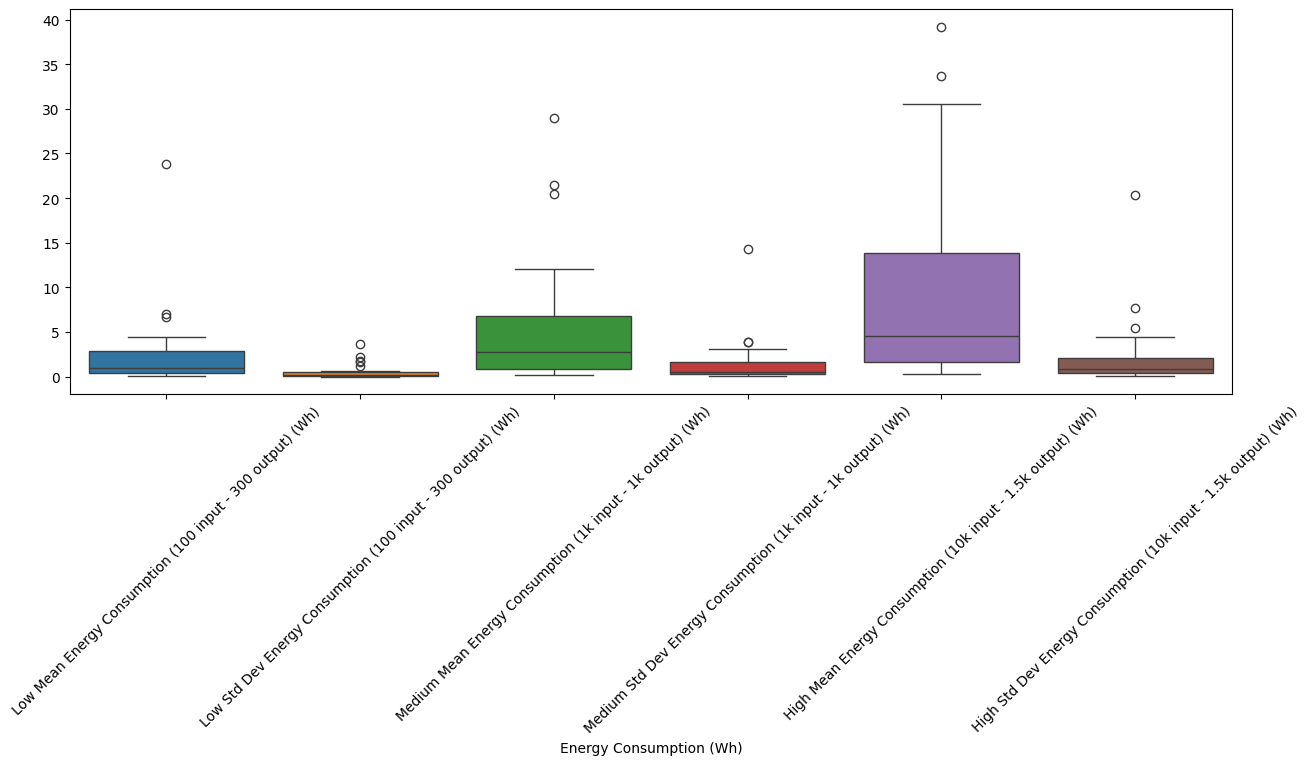

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=energy_df)
plt.xlabel("Energy Consumption (Wh)")
plt.xticks(rotation=45)
plt.show()

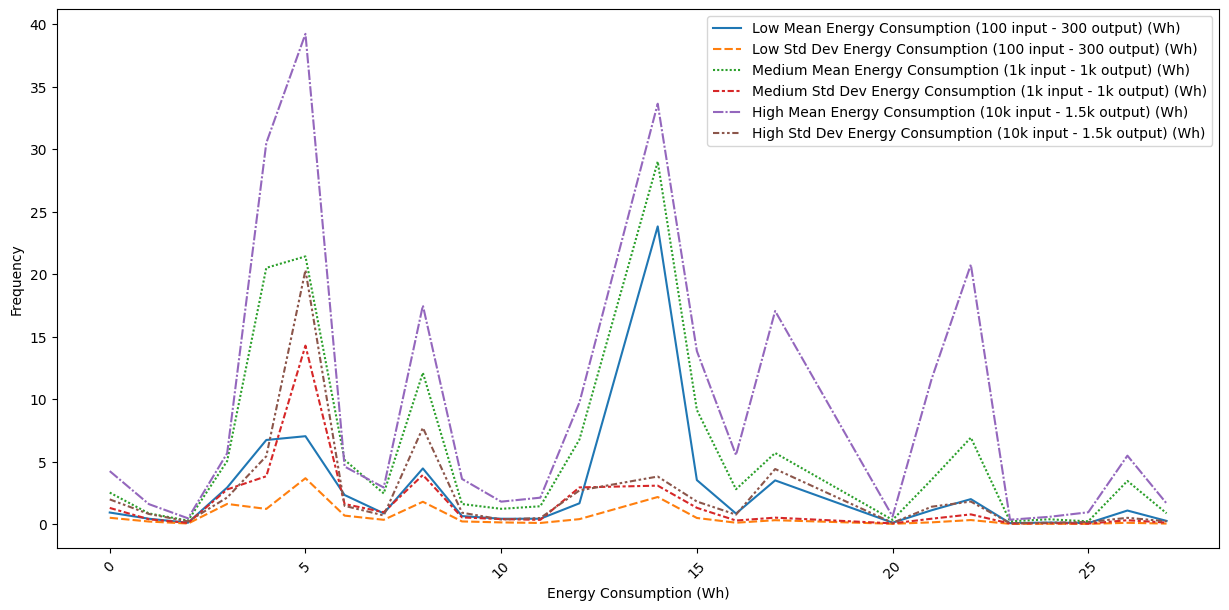

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(energy_df)
plt.xlabel("Energy Consumption (Wh)")
plt.xticks(rotation=45)
plt.xlabel("Energy Consumption (Wh)")
plt.ylabel("Frequency")
plt.show()

<Figure size 2000x500 with 0 Axes>

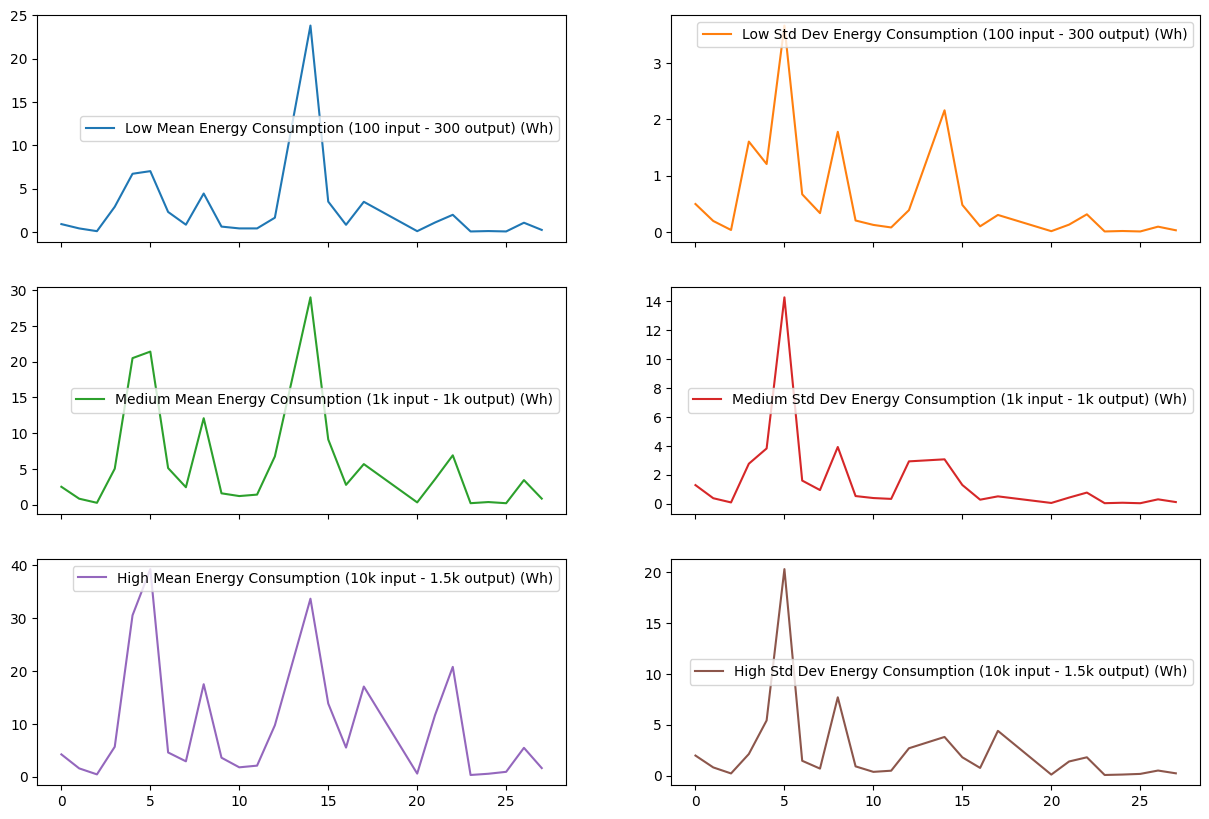

In [ ]:
plt.figure(figsize=(20,5))
energy_df.plot(subplots=True,figsize=(15,10), layout=(3,2))
plt.show()

## Data Previews

In [ ]:
print(" Claude AI Usage Data Preview: ")
claude_df.head()

 Claude AI Usage Data Preview: 


,Occupation,Percent_Workers_Using_Claude,Percent_Claude_User_Conversations,Industry,Job_Role,Work Usage of Claude,Top Tasks,Top Task Allocation
0,Office and Administrative Support,0.079,0.122,Computer and Mathematical,Computer Programmers,0.061,Develop and maintain software applications and...,0.168
1,Transportation and Material Moving,0.003,0.091,Computer and Mathematical,"Software Developers, Systems Software",0.053,Program and debug computer systems and machinery,0.069
2,Saled and Related,0.023,0.088,Computer and Mathematical,"Software Developers, Applications",0.034,Design and maintain database systems for data ...,0.023
3,Food Preparation and Serving Related,0.005,0.087,"Arts, Design, Sports, Entertainment, and Media",Technical Writers,0.018,"Produce and perform in film, TV, theater, and ...",0.018
4,General Management,0.045,0.069,"Arts, Design, Sports, Entertainment, and Media",Copy Writers,0.016,Manage organizational public relations and str...,0.013


In [ ]:
print("Energy Usage Data Preview: ")
energy_df.head()

Energy Usage Data Preview: 


,AI Model,Low Mean Energy Consumption (100 input - 300 output) (Wh),Low Std Dev Energy Consumption (100 input - 300 output) (Wh),Medium Mean Energy Consumption (1k input - 1k output) (Wh),Medium Std Dev Energy Consumption (1k input - 1k output) (Wh),High Mean Energy Consumption (10k input - 1.5k output) (Wh),High Std Dev Energy Consumption (10k input - 1.5k output) (Wh)
0,GPT 4.1,0.918,0.498,2.513,1.286,4.233,1.968
1,GPT 4.1 mini,0.421,0.197,0.847,0.379,1.59,0.801
2,GPT 4.1 nano,0.103,0.037,0.271,0.087,0.454,0.208
3,o4-mini (high),2.916,1.605,5.039,2.764,5.666,2.118
4,GPT-4.5,6.723,1.207,20.500,3.821,30.495,5.424


In [ ]:
print("AI Productivity Data Preview: ")
fed_df.head()

AI Productivity Data Preview: 


,frequency/intensity,Average time saved with AI
0,high,120.0
1,high,120.0
2,high,120.0
3,high,120.0
4,high,120.0


## Dataset Information

In [ ]:
# .info() for each dataset
print("\n Claude Dataset: \n")
claude_df.info()

print("\n Energy Dataset: \n")
energy_df.info()

print("\n Time Saved with AI Dataset: \n")
fed_df.info()


 Claude Dataset: 

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Occupation                         18 non-null     object 
 1   Percent_Workers_Using_Claude       18 non-null     float64
 2   Percent_Claude_User_Conversations  18 non-null     float64
 3   Industry                           18 non-null     object 
 4   Job_Role                           18 non-null     object 
 5   Work Usage of Claude               18 non-null     float64
 6   Top Tasks                          18 non-null     object 
 7   Top Task Allocation                18 non-null     float64
dtypes: float64(4), object(4)
memory usage: 1.3+ KB

 Energy Dataset: 

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 27
Data columns (total 7 columns):
 #   Column                                                          Non-N

## Statistical Summary

In [ ]:
# Statistical Summary - Claude AI Usage
print("Statistical Summary: Claude AI Usage")
# Claude AI Usage
claude_df.describe().T


Statistical Summary: Claude AI Usage


,count,mean,std,min,25%,50%,75%,max
Percent_Workers_Using_Claude,18.0,0.023222,0.023391,0.001,0.00425,0.0165,0.03275,0.079
Percent_Claude_User_Conversations,18.0,0.076222,0.079255,0.020,0.03950,0.0595,0.08775,0.372
Work Usage of Claude,18.0,0.016500,0.017264,0.004,0.00400,0.0105,0.01750,0.061
Top Task Allocation,18.0,0.023556,0.038912,0.003,0.00725,0.0125,0.01800,0.168


In [ ]:
# Statistical Summary - Energy Usage
print("Statistical Summary: Energy Consumption Data")
energy_df.describe().T

Statistical Summary: Energy Consumption Data


,count,mean,std,min,25%,50%,75%,max
Low Mean Energy Consumption (100 input - 300 output) (Wh),25.0,2.61124,4.838247,0.070,0.421,0.918,2.916,23.815
Low Std Dev Energy Consumption (100 input - 300 output) (Wh),25.0,0.57900,0.876283,0.011,0.082,0.205,0.498,3.663
Medium Mean Energy Consumption (1k input - 1k output) (Wh),25.0,5.75004,7.508013,0.214,0.857,2.781,6.758,29.000
Medium Std Dev Energy Consumption (1k input - 1k output) (Wh),25.0,1.60772,2.911178,0.033,0.277,0.508,1.599,14.273
High Std Dev Energy Consumption (10k input - 1.5k output) (Wh),25.0,2.40620,4.182484,0.056,0.363,0.904,2.118,20.317


In [ ]:
# Statistical Summary - AI Time Saved
print("Statistical Summary: Average Time Saved with AI")
# AI Productivity (Fed Reserve Study)
fed_df.describe().T

Statistical Summary: Average Time Saved with AI


,count,mean,std,min,25%,50%,75%,max
Average time saved with AI,92926.0,53.668602,46.2344,7.0,29.5,29.5,120.0,120.0


# Part 2: Model Development & Evaluation Metrics
NOTE: This section is being edited


In [ ]:
#column norm

energy_cols_map = {
    'AI Model (28 different versions)': 'ai_model',
    'AI Model': 'ai_model',
    'Low Mean Energy Consumption (100 input - 300 output) (Wh)': 'low_mean_wh',
    'Low Std Dev Energy Consumption (100 input - 300 output) (Wh)': 'low_std_wh',
    'Medium Mean Energy Consumption (1k input - 1k output) (Wh)': 'med_mean_wh',
    'Medium Std Dev Energy Consumption (1k input - 1k output) (Wh)': 'med_std_wh',
    'High Mean Energy Consumption (10k input - 1.5k output) (Wh)': 'high_mean_wh',
    'High Std Dev Energy Consumption (10k input - 1.5k output) (Wh)': 'high_std_wh'
}
energy_df = energy_df.rename(columns={k:v for k,v in energy_cols_map.items() if k in energy_df.columns})

for c in ['low_mean_wh', 'med_mean_wh', 'high_mean_wh']:
    if c in energy_df.columns:
        energy_df[c] = pd.to_numeric(energy_df[c], errors='coerce')

# Use med_mean_wh as a proxy for "model power"
cap_base = (
    energy_df[['ai_model', 'med_mean_wh']]
    .dropna()
    .drop_duplicates('ai_model')
)

# Normalize to 0–1
cap_min = cap_base['med_mean_wh'].min()
cap_max = cap_base['med_mean_wh'].max()
cap_base['cap_norm'] = (cap_base['med_mean_wh'] - cap_min) / (cap_max - cap_min + 1e-8)

# Map to a scale like 0.7–1.3 (tunable)
low_scale, high_scale = 0.7, 1.3
cap_base['cap_scale'] = low_scale + cap_base['cap_norm'] * (high_scale - low_scale)

# Dict: ai_model -> capability multiplier
model_capability = dict(zip(cap_base['ai_model'], cap_base['cap_scale']))
print("Capability scale sample:", list(model_capability.items())[:5])

# -- FED DF: rename to consistent names
fed_cols_map = {
    'Average time saved with AI (quantitative)': 'avg_minutes_saved',
    'frequency/intensity': 'intensity'
}
fed_df = fed_df.rename(columns={k:v for k,v in fed_cols_map.items() if k in fed_df.columns})



Capability scale sample: [('GPT 4.1', 0.7479191273369279), ('GPT 4.1 mini', 0.7131939137034691), ('GPT 4.1 nano', 0.7011880775372792), ('o4-mini (high)', 0.8005697213574064), ('GPT-4.5 ', 1.1228305424779994)]


In [ ]:
#model 1: Energy model

#long_energy = []
#for _, r in energy_df.iterrows():
#    for level, col in [('Low','low_mean_wh'), ('Medium','med_mean_wh'), ('High','high_mean_wh')]:
#        if col in energy_df.columns and pd.notnull(r.get(col, np.nan)):
#            long_energy.append({'ai_model': r['ai_model'], 'intensity': level, 'mean_wh': r[col]})
#long_energy = pd.DataFrame(long_energy).dropna()

#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score

#X_energy = long_energy[['ai_model','intensity']]
#y_energy = long_energy['mean_wh']

#Xe_tr, Xe_te, ye_tr, ye_te = train_test_split(X_energy, y_energy, test_size=0.25, random_state=42)

#prep_e = ColumnTransformer([
#    ('cat', OneHotEncoder(handle_unknown='ignore'), ['ai_model','intensity'])
#])

#energy_model = Pipeline([
#    ('prep', prep_e),
#    ('lin', LinearRegression())
#])

#energy_model.fit(Xe_tr, ye_tr)
#ye_hat = energy_model.predict(Xe_te)

#def rmse(y_true, y_pred):
#    try:
#        # newer sklearn
#        from sklearn.metrics import mean_squared_error
#        return mean_squared_error(y_true, y_pred, squared=False)
#    except TypeError:
#        # older sklearn: no 'squared' kwarg
#        from sklearn.metrics import mean_squared_error
#        return np.sqrt(mean_squared_error(y_true, y_pred))

# --- Metrics ---
#print(f"[ENERGY] Test RMSE = {rmse(ye_te, ye_hat):.3f} Wh")
#print(f"[ENERGY] Test R²   = {r2_score(ye_te, ye_hat):.3f}")


In [ ]:
# Energy model

# Coerce to numeric (handles 'object' High column)
for c in ['low_mean_wh','med_mean_wh','high_mean_wh']:
    energy_df[c] = pd.to_numeric(energy_df[c], errors='coerce')

# Wide -> long
long_energy = (
    energy_df[['ai_model','low_mean_wh','med_mean_wh','high_mean_wh']]
      .melt(id_vars='ai_model', var_name='level', value_name='mean_wh')
      .dropna(subset=['mean_wh'])
      .assign(intensity=lambda d: d['level'].map({
          'low_mean_wh':'Low','med_mean_wh':'Medium','high_mean_wh':'High'
      }))
      [['ai_model','intensity','mean_wh']]
)
long_energy['intensity'] = pd.Categorical(long_energy['intensity'],
                                          ['Low','Medium','High'], ordered=True)

def _find_col(df, must_contain):
    must = [m.lower() for m in must_contain]
    for c in df.columns:
        s = str(c).strip().lower()
        if all(m in s for m in must):
            return c
    return None

occ_col   = _find_col(claude_df, ["occupation"]) or "Occupation"
share_col = _find_col(claude_df, ["percent", "conversations"])     # "Percent of Claude User Conversations"
usage_col = _find_col(claude_df, ["percent", "workers", "using"])  # "Percent of U.S. Workers Using Claude"

# Build normalized weights (conversation share preferred)
claude_use = claude_df.copy()
if share_col and share_col in claude_use.columns:
    weights = pd.to_numeric(claude_use[share_col], errors='coerce')
elif usage_col and usage_col in claude_use.columns:
    weights = pd.to_numeric(claude_use[usage_col], errors='coerce')
else:
    weights = pd.Series(np.ones(len(claude_use)), index=claude_use.index, dtype=float)

claude_use['weight'] = weights.fillna(0)
total_w = claude_use['weight'].sum()
claude_use['weight'] = (claude_use['weight'] / total_w) if total_w > 0 else (1.0 / max(len(claude_use), 1))

def weekly_energy_by_occupation(ai_model_choice,
                                intensities=('Low','Medium','High'),
                                total_tasks_week=1000,
                                top_n=12,
                                stack=False):
    """
    Compute/plot weekly Wh by occupation for one or more intensities.
    - intensities: str ('Medium') or iterable ('Low','Medium','High')
    - total_tasks_week: total tasks to allocate across occupations (per intensity)
    - stack: stacked vs grouped bars
    """
    # normalize to list
    if isinstance(intensities, (str,)):
        intensities = [intensities]

    # pull per-call Wh for this model at requested intensities
    sub = long_energy[(long_energy['ai_model'] == ai_model_choice) &
                      (long_energy['intensity'].isin(intensities))].copy()
    if sub.empty:
        print(f"[WARN] Model '{ai_model_choice}' not found for intensities={intensities}.")
        return None

    # cross occupations × intensities
    frames = []
    for lvl, per_call_wh in zip(sub['intensity'], sub['mean_wh']):
        tmp = claude_use[[occ_col, 'weight']].copy()
        tmp['intensity']   = lvl
        tmp['tasks_week']  = tmp['weight'] * float(total_tasks_week)
        tmp['weekly_wh']   = tmp['tasks_week'] * float(per_call_wh)
        frames.append(tmp)

    out = pd.concat(frames, ignore_index=True).sort_values('weekly_wh', ascending=False)

    # plot
    fig = px.bar(
        out.head(top_n * len(intensities)),
        x=occ_col, y='weekly_wh', color='intensity',
        category_orders={'intensity':['Low','Medium','High']},
        title=(f"Weekly Energy by Occupation — {ai_model_choice} • "
               f"{total_tasks_week} tasks/week per intensity"),
        labels={'weekly_wh':'Energy (Wh) per week', occ_col:'Occupation'}
    )
    fig.update_layout(xaxis_tickangle=-45, barmode='stack' if stack else 'group')
    fig.show()
    return out

# Example usage:
# Choose a model to demonstrate (lowest per-call Wh model at the chosen intensity)
if not long_energy.empty:
    demo_model = long_energy.sort_values('mean_wh').iloc[0]['ai_model']
    _ = weekly_energy_by_occupation(
        ai_model_choice=demo_model,
        intensities=('Low','Medium','High'),
        total_tasks_week=1000,
        top_n=12,
        stack=False
    )

# composite stratification: intensity + value bin <<<
bins = pd.qcut(long_energy['mean_wh'], q=min(4, long_energy['mean_wh'].nunique()), duplicates='drop')
strata = long_energy['intensity'].astype(str) + "_" + bins.astype(str)

X = long_energy[['ai_model','intensity']]
y = long_energy['mean_wh']

Xe_tr, Xe_te, ye_tr, ye_te = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=strata
)

preproc = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['ai_model','intensity'])
])
energy_model = Pipeline([
    ('prep', preproc),
    ('glm', TweedieRegressor(power=1.5, link='log', alpha=0.0, max_iter=2000))
])
energy_model.fit(Xe_tr, ye_tr)

ye_hat_tr = energy_model.predict(Xe_tr)
ye_hat_te = energy_model.predict(Xe_te)

def _rmse(a,b):
    try: return mean_squared_error(a,b,squared=False)
    except TypeError: return np.sqrt(mean_squared_error(a,b))

print("Train/Test ranges (Actual):",
      f"train max={float(ye_tr.max()):.3f}, test max={float(ye_te.max()):.3f}")

# Build eval_df for Plotly
eval_df = Xe_te.copy().reset_index(drop=True)
eval_df['actual_wh'] = ye_te.reset_index(drop=True)
eval_df['pred_wh']   = pd.Series(ye_hat_te).reset_index(drop=True)
eval_df['residual']  = eval_df['actual_wh'] - eval_df['pred_wh']


Train/Test ranges (Actual): train max=39.223, test max=23.815


In [ ]:
# Clean intensity labels again (safe if already done)
_intensity_map = {'H':'High','h':'High','high':'High',
                  'M':'Medium','m':'Medium','medium':'Medium',
                  'L':'Low','l':'Low','low':'Low'}
fed_df['intensity'] = fed_df['intensity'].astype(str).str.strip().map(lambda x: _intensity_map.get(x, x))

fed_cols_map = {
    'Average time saved with AI': 'avg_minutes_saved',   # <-- fix this key
    'frequency/intensity': 'intensity'
}
fed_df = fed_df.rename(columns={k:v for k,v in fed_cols_map.items() if k in fed_df.columns})

fed_ok = fed_df[['intensity','avg_minutes_saved']].dropna()
fed_ok = fed_ok[fed_ok['intensity'].isin(['Low','Medium','High'])].copy()

# Minutes per task by intensity (use median for robustness)
minutes_per_task = fed_ok.groupby('intensity')['avg_minutes_saved'].median().reindex(['Low','Medium','High'])
# If any is missing, fall back to defaults you used
minutes_per_task = minutes_per_task.fillna(pd.Series({'Low':7.0,'Medium':29.5,'High':120.0}))

# Intensity frequency share from Fed data (proxy for workload mix)
intensity_share = (
    fed_ok['intensity'].value_counts(normalize=True)
    .reindex(['Low','Medium','High'])
    .fillna(0.0)
)

# ---------- 2) Claude: occupation weights ----------
def _find_col(df, must_contain):
    must = [m.lower() for m in must_contain]
    for c in df.columns:
        s = str(c).strip().lower()
        if all(m in s for m in must):
            return c
    return None

occ_col   = _find_col(claude_df, ["occupation"]) or "Occupation"
share_col = _find_col(claude_df, ["percent", "conversations"])     # preferred
usage_col = _find_col(claude_df, ["percent", "workers", "using"])  # fallback

claude_use = claude_df[[occ_col]].copy()
if share_col and share_col in claude_df.columns:
    w = pd.to_numeric(claude_df[share_col], errors='coerce')
elif usage_col and usage_col in claude_df.columns:
    w = pd.to_numeric(claude_df[usage_col], errors='coerce')
else:
    w = pd.Series(np.ones(len(claude_df)), index=claude_df.index, dtype=float)
w = w.fillna(0)
total_w = w.sum()
w = (w / total_w) if total_w > 0 else pd.Series(np.full(len(w), 1.0/len(w)), index=w.index)
claude_use['occ_weight'] = w.values


# Choose a planning horizon (total minutes to deliver per week across all intensities)
TOTAL_MINUTES_WEEK = 100_000  # <-- tweak for your scenario/reporting

# Compute tasks/week for each intensity using minutes_per_task & intensity_share
tasks_per_intensity = {}
for lvl in ['Low','Medium','High']:
    share = float(intensity_share.get(lvl, 0.0))
    mpt   = float(minutes_per_task.get(lvl, np.nan))  # minutes per task
    if mpt and mpt > 0:
        tasks_per_intensity[lvl] = (TOTAL_MINUTES_WEEK * share) / mpt
    else:
        tasks_per_intensity[lvl] = 0.0

# Build Cartesian product: (model,intensity,mean_wh) x (occupation,occ_weight)
train_base = long_energy.merge(claude_use, how='cross')

# Add numeric features derived from Fed & Claude
train_base['minutes_per_task'] = train_base['intensity'].map(minutes_per_task).astype(float)
train_base['intensity_share']  = train_base['intensity'].map(intensity_share).astype(float)
train_base['tasks_week']       = train_base['intensity'].map(tasks_per_intensity).astype(float) * train_base['occ_weight'].astype(float)

# Target: WEEKLY energy (Wh/week) = per-inference Wh * tasks/week for that (intensity × occupation)
train_base['weekly_wh'] = train_base['mean_wh'].astype(float) * train_base['tasks_week'].astype(float)

# (Optional) sanity clamp negatives/NaNs
train_base = train_base.replace([np.inf, -np.inf], np.nan).dropna(subset=['weekly_wh'])

# ---------- 4) Fit ONE model on weekly_wh using ALL datasets ----------
features_cat = ['ai_model','intensity', occ_col]     # categorical from energy + occupations
features_num = ['minutes_per_task','intensity_share','occ_weight']  # numeric from fed + claude

X_all = train_base[features_cat + features_num]
y_all = train_base['weekly_wh']

X_tr, X_te, y_tr, y_te = train_test_split(X_all, y_all, test_size=0.25, random_state=42)

# OneHotEncoder that returns dense
try:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # sklearn >= 1.2
except TypeError:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)         # older sklearn

# Force ColumnTransformer to produce dense
prep = ColumnTransformer(
    transformers=[('onehot', ohe, features_cat)],
    remainder='passthrough',
    sparse_threshold=0.0
)

# A small, robust HGB works well on tabular data
hgb = HistGradientBoostingRegressor(
    max_depth=3,          # shallow trees to avoid overfit
    max_iter=500,         # more boosting rounds
    learning_rate=0.07,   # moderate LR
    min_samples_leaf=25,  # extra smoothing
    l2_regularization=0.0 # can set to 0.1 if you see overfit
)

# Wrap with a target transformer: train on log1p(y), predict with expm1
ttr = TransformedTargetRegressor(
    regressor=hgb,
    func=np.log1p,
    inverse_func=np.expm1
)
unified_energy_model = Pipeline([
    ('prep', prep),
    ('hgb_log', ttr)   # your TransformedTargetRegressor with HGB
])

unified_energy_model.fit(X_tr, y_tr)


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   sparse_threshold=0.0,
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['ai_model', 'intensity',
                                                   'Occupation'])])),
                ('hgb_log',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=HistGradientBoostingRegressor(learning_rate=0.07,
                                                                                    max_depth=3,
                                                                                    max_iter=500,
                                                                                    min_samples_leaf=25)))])

In [ ]:
# --- Predict ---
y_hat = unified_energy_model.predict(X_te)

y_true_w = np.asarray(y_te).ravel()
y_pred_w = np.asarray(y_hat).ravel()

# --- Helper metrics (robust to zeros/NaNs) ---
def safe_mape(y_true, y_pred, eps=1e-8):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    denom = np.maximum(np.abs(y_true), eps)
    return np.mean(np.abs((y_true - y_pred) / denom)) * 100.0

def accuracy_within_pct(y_true, y_pred, pct=0.10, eps=1e-8):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    denom = np.maximum(np.abs(y_true), eps)
    rel_err = np.abs(y_true - y_pred) / denom
    return float(np.mean(rel_err <= pct)) * 100.0

def rmse_compat(y_true, y_pred):
    try:
        return mean_squared_error(y_true, y_pred, squared=False)  # newer sklearn
    except TypeError:
        return np.sqrt(mean_squared_error(y_true, y_pred))        # older sklearn

def pearson_r(y_true, y_pred):
    if len(y_true) < 2:
        return np.nan
    try:
        from scipy.stats import pearsonr as _pearsonr
        r, _ = _pearsonr(y_true, y_pred)
        return r
    except Exception:
        return np.nan

def summarize_metrics(y_true, y_pred):
    return {
        "RMSE": rmse_compat(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred),
        "MAPE%": safe_mape(y_true, y_pred),
        "MedAE": np.median(np.abs(np.asarray(y_true) - np.asarray(y_pred))),
        "ExplainedVar": explained_variance_score(y_true, y_pred),
        "Pearson_r": pearson_r(y_true, y_pred),
        "Acc@10%": accuracy_within_pct(y_true, y_pred, pct=0.10),
        "Acc@20%": accuracy_within_pct(y_true, y_pred, pct=0.20),
    }

# --- Weekly metrics ---
week_metrics = summarize_metrics(y_true_w, y_pred_w)

# --- Derive Daily from Weekly ---
y_true_d = y_true_w / 7.0
y_pred_d = y_pred_w / 7.0
day_metrics = summarize_metrics(y_true_d, y_pred_d)

# --- Print a compact metrics summary ---
def _fmt(d):  # pretty formatting
    return {k: (f"{v:,.3f}" if k not in ("MAPE%","Acc@10%","Acc@20%") else f"{v:,.2f}%") for k,v in d.items()}

print("[UNIFIED ENERGY MODEL] Weekly metrics:", _fmt(week_metrics))
print("[UNIFIED ENERGY MODEL]  Daily metrics:", _fmt(day_metrics))

# --- Diagnostics dataframe (WEEKLY), used for both weekly & daily plots ---
diag = X_te.copy().reset_index(drop=True)
diag['actual_weekly_wh'] = pd.Series(y_true_w).reset_index(drop=True)
diag['pred_weekly_wh']   = pd.Series(y_pred_w).reset_index(drop=True)
diag = diag.replace([np.inf, -np.inf], np.nan).dropna(subset=['actual_weekly_wh','pred_weekly_wh'])

# Add daily columns for convenience
diag['actual_daily_wh'] = diag['actual_weekly_wh'] / 7.0
diag['pred_daily_wh']   = diag['pred_weekly_wh']   / 7.0

# pick an occupation column if present
occ_col_candidates = ['Occupation','occupation','Job_Role','Job Role']
occ_col_present = next((c for c in occ_col_candidates if c in diag.columns), None)

# limit hover data to existing columns
wanted_hover = ['ai_model','intensity','minutes_per_task','intensity_share','occ_weight']
hover_cols = [c for c in wanted_hover if c in diag.columns]
if occ_col_present:
    hover_cols = [occ_col_present] + hover_cols

# --- Robust outlier filtering for nicer plots/metrics ---
diag['residual_weekly'] = diag['actual_weekly_wh'] - diag['pred_weekly_wh']

# MAD-based robust z-score on residuals
res = diag['residual_weekly'].to_numpy()
med = np.median(res)
mad = np.median(np.abs(res - med)) + 1e-8
robust_z = np.abs(res - med) / (1.4826 * mad)

# Also drop the top 1% of actuals (the giant points on the right)
hi_actual_thresh = np.quantile(diag['actual_weekly_wh'], 0.99)

# Outlier mask (tweak thresholds if you want)
mask_outliers = (robust_z > 3) | (diag['actual_weekly_wh'] > hi_actual_thresh)

diag_nice = diag.loc[~mask_outliers].copy()
print(f"[Filter] Removed {int(mask_outliers.sum())} outliers "
      f"({mask_outliers.mean()*100:.1f}% of test points).")

# Recompute filtered metrics (optional, for reporting)
y_true_w_f = diag_nice['actual_weekly_wh'].to_numpy()
y_pred_w_f = diag_nice['pred_weekly_wh'].to_numpy()

def wape(y_true, y_pred, eps=1e-8):
    num = np.sum(np.abs(y_true - y_pred)); den = np.maximum(np.sum(np.abs(y_true)), eps)
    return (num / den) * 100.0

def smape(y_true, y_pred, eps=1e-8):
    denom = np.maximum((np.abs(y_true) + np.abs(y_pred))/2.0, eps)
    return np.mean(np.abs(y_true - y_pred) / denom) * 100.0

def accuracy_within_pct_floor(y_true, y_pred, pct=0.10):
    floor = np.quantile(np.abs(y_true), 0.10)
    denom = np.maximum(np.abs(y_true), floor)
    return float(np.mean(np.abs(y_true - y_pred)/denom <= pct)) * 100.0

week_metrics_f = {
    "RMSE": rmse_compat(y_true_w_f, y_pred_w_f),
    "MAE": mean_absolute_error(y_true_w_f, y_pred_w_f),
    "R2": r2_score(y_true_w_f, y_pred_w_f),
    "WAPE%": wape(y_true_w_f, y_pred_w_f),
    "sMAPE%": smape(y_true_w_f, y_pred_w_f),
    "MAPE%": safe_mape(y_true_w_f, y_pred_w_f),
    "Acc@10%": accuracy_within_pct_floor(y_true_w_f, y_pred_w_f, 0.10),
    "Acc@20%": accuracy_within_pct_floor(y_true_w_f, y_pred_w_f, 0.20),
}

y_true_d_f = y_true_w_f / 7.0
y_pred_d_f = y_pred_w_f / 7.0
day_metrics_f = {
    "RMSE": rmse_compat(y_true_d_f, y_pred_d_f),
    "MAE": mean_absolute_error(y_true_d_f, y_pred_d_f),
    "R2": r2_score(y_true_d_f, y_pred_d_f),
    "WAPE%": wape(y_true_d_f, y_pred_d_f),
    "sMAPE%": smape(y_true_d_f, y_pred_d_f),
    "MAPE%": safe_mape(y_true_d_f, y_pred_d_f),
    "Acc@10%": accuracy_within_pct_floor(y_true_d_f, y_pred_d_f, 0.10),
    "Acc@20%": accuracy_within_pct_floor(y_true_d_f, y_pred_d_f, 0.20),
}

def _fmtp(d):
    return {k: (f"{v:,.3f}" if "@" not in k and "%" not in k else f"{v:,.2f}%") for k,v in d.items()}

print("[UNIFIED ENERGY MODEL] Weekly (filtered) :", _fmtp(week_metrics_f))
print("[UNIFIED ENERGY MODEL]  Daily  (filtered) :", _fmtp(day_metrics_f))



[UNIFIED ENERGY MODEL] Weekly metrics: {'RMSE': '270.388', 'MAE': '74.455', 'R2': '0.911', 'MAPE%': '14.53%', 'MedAE': '11.158', 'ExplainedVar': '0.915', 'Pearson_r': '0.987', 'Acc@10%': '45.27%', 'Acc@20%': '72.78%'}
[UNIFIED ENERGY MODEL]  Daily metrics: {'RMSE': '38.627', 'MAE': '10.636', 'R2': '0.911', 'MAPE%': '14.53%', 'MedAE': '1.594', 'ExplainedVar': '0.915', 'Pearson_r': '0.987', 'Acc@10%': '45.27%', 'Acc@20%': '72.78%'}
[Filter] Removed 83 outliers (24.6% of test points).
[UNIFIED ENERGY MODEL] Weekly (filtered) : {'RMSE': '13.731', 'MAE': '9.467', 'R2': '0.995', 'WAPE%': '7.95%', 'sMAPE%': '11.28%', 'MAPE%': '11.78%', 'Acc@10%': '59.22%', 'Acc@20%': '86.27%'}
[UNIFIED ENERGY MODEL]  Daily  (filtered) : {'RMSE': '1.962', 'MAE': '1.352', 'R2': '0.995', 'WAPE%': '7.95%', 'sMAPE%': '11.28%', 'MAPE%': '11.78%', 'Acc@10%': '59.22%', 'Acc@20%': '86.27%'}


In [ ]:
# ---- Settings ----
TOL = 0.25  # accuracy tolerance: ±10%

# ---- Helpers ----
def nice_markers(fig, size=12, opacity=0.9):
    fig.update_traces(marker=dict(size=size, opacity=opacity), selector=dict(mode='markers'))
    fig.update_layout(template="plotly_white")

def add_diag_line(fig, x0, y0, x1, y1):
    fig.add_shape(type="line", x0=x0, y0=y0, x1=x1, y1=y1,
                  line=dict(dash="dash", width=2))

def cls_metrics_from_reg(y_true, y_pred, tol=TOL, eps=1e-8):
    """
    Treat regression as a 'correct within ±tol' classification.
    'Positive' = prediction is within tolerance of the true value.
    Returns Accuracy, Precision, Recall, F1, and supports.
    """
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    if y_true.size == 0:
        return {
            "Accuracy": np.nan, "Precision": np.nan, "Recall": np.nan, "F1": np.nan,
            "Support_Pos": 0, "Support_Total": 0
        }

    denom  = np.maximum(np.abs(y_true), eps)
    within = (np.abs(y_true - y_pred) / denom) <= tol  # True = 'correct'

    from sklearn.metrics import precision_recall_fscore_support, accuracy_score
    y_ref = np.ones_like(within, dtype=int)        # ground truth: should be correct
    y_bin = within.astype(int)                     # prediction: is correct (1) vs not (0)

    acc = accuracy_score(y_ref, y_bin) * 100.0
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_ref, y_bin, average='binary', pos_label=1, zero_division=0
    )

    support_pos = int(np.sum(y_ref == 1))          # number of positives in ground truth
    support_tot = int(len(y_bin))

    return {
        "Accuracy": acc,
        "Precision": prec * 100.0,
        "Recall": rec * 100.0,
        "F1": f1 * 100.0,
        "Support_Pos": support_pos,
        "Support_Total": support_tot,
    }


def pct(x): return f"{x:,.2f}%"

# ---- Classification-style metrics (UNFILTERED) ----
cls_week_unf = cls_metrics_from_reg(y_true_w, y_pred_w, tol=TOL)
cls_day_unf  = cls_metrics_from_reg(y_true_d, y_pred_d, tol=TOL)

print(f"[UNFILTERED] Weekly Accuracy(±{int(TOL*100)}%): {pct(cls_week_unf['Accuracy'])} | "
      f"P {pct(cls_week_unf['Precision'])}  R {pct(cls_week_unf['Recall'])}  F1 {pct(cls_week_unf['F1'])}  "
      f"Support={cls_week_unf['Support_Pos']}/{cls_week_unf['Support_Total']}")
print(f"[UNFILTERED]  Daily  Accuracy(±{int(TOL*100)}%): {pct(cls_day_unf['Accuracy'])} | "
      f"P {pct(cls_day_unf['Precision'])}  R {pct(cls_day_unf['Recall'])}  F1 {pct(cls_day_unf['F1'])}  "
      f"Support={cls_day_unf['Support_Pos']}/{cls_day_unf['Support_Total']}")

# ---- Classification-style metrics (FILTERED) ----
if len(diag_nice):
    y_true_w_f = diag_nice['actual_weekly_wh'].to_numpy()
    y_pred_w_f = diag_nice['pred_weekly_wh'].to_numpy()
    y_true_d_f = y_true_w_f / 7.0
    y_pred_d_f = y_pred_w_f / 7.0

    cls_week_f = cls_metrics_from_reg(y_true_w_f, y_pred_w_f, tol=TOL)
    cls_day_f  = cls_metrics_from_reg(y_true_d_f, y_pred_d_f, tol=TOL)

    print(f"[FILTERED]   Weekly Accuracy(±{int(TOL*100)}%): {pct(cls_week_f['Accuracy'])} | "
          f"P {pct(cls_week_f['Precision'])}  R {pct(cls_week_f['Recall'])}  F1 {pct(cls_week_f['F1'])}  "
          f"Support={cls_week_f['Support_Pos']}/{cls_week_f['Support_Total']}")
    print(f"[FILTERED]    Daily  Accuracy(±{int(TOL*100)}%): {pct(cls_day_f['Accuracy'])} | "
          f"P {pct(cls_day_f['Precision'])}  R {pct(cls_day_f['Recall'])}  F1 {pct(cls_day_f['F1'])}  "
          f"Support={cls_day_f['Support_Pos']}/{cls_day_f['Support_Total']}")

# ---- UNFILTERED plots with bigger markers ----
if len(diag):
    # Daily parity
    lo_d0 = float(min(diag['actual_daily_wh'].min(), diag['pred_daily_wh'].min()))
    hi_d0 = float(max(diag['actual_daily_wh'].max(), diag['pred_daily_wh'].max()))
    fig = px.scatter(
        diag, x='actual_daily_wh', y='pred_daily_wh',
        color=occ_col_present, title='Unified Energy Model — Predicted vs Actual (Daily Wh) — Unfiltered',
        hover_data=hover_cols
    ); add_diag_line(fig, lo_d0, lo_d0, hi_d0, hi_d0); nice_markers(fig); fig.show()

    # Weekly parity
    lo_w0 = float(min(diag['actual_weekly_wh'].min(), diag['pred_weekly_wh'].min()))
    hi_w0 = float(max(diag['actual_weekly_wh'].max(), diag['pred_weekly_wh'].max()))
    fig = px.scatter(
        diag, x='actual_weekly_wh', y='pred_weekly_wh',
        color=occ_col_present, title='Unified Energy Model — Predicted vs Actual (Weekly Wh) — Unfiltered',
        hover_data=hover_cols
    ); add_diag_line(fig, lo_w0, lo_w0, hi_w0, hi_w0); nice_markers(fig); fig.show()

    # Weekly residuals
    diag['residual_weekly'] = diag['actual_weekly_wh'] - diag['pred_weekly_wh']
    fig = px.scatter(
        diag, x='pred_weekly_wh', y='residual_weekly',
        color=occ_col_present, title='Unified Energy Model — Residuals (Weekly) — Unfiltered',
        labels={'residual_weekly':'Residual (Actual - Pred)'}, hover_data=hover_cols
    ); fig.add_shape(type="line",
                     x0=float(diag['pred_weekly_wh'].min()), y0=0,
                     x1=float(diag['pred_weekly_wh'].max()), y1=0,
                     line=dict(dash="dash", width=2))
    nice_markers(fig); fig.show()

    # Daily residuals
    diag['residual_daily'] = diag['actual_daily_wh'] - diag['pred_daily_wh']
    fig = px.scatter(
        diag, x='pred_daily_wh', y='residual_daily',
        color=occ_col_present, title='Unified Energy Model — Residuals (Daily) — Unfiltered',
        labels={'residual_daily':'Residual (Actual - Pred)'}, hover_data=hover_cols
    ); fig.add_shape(type="line",
                     x0=float(diag['pred_daily_wh'].min()), y0=0,
                     x1=float(diag['pred_daily_wh'].max()), y1=0,
                     line=dict(dash="dash", width=2))
    nice_markers(fig); fig.show()
else:
    print("[WARN] No valid rows to plot (unfiltered).")

# ---- FILTERED plots again, but with bigger markers ----
if len(diag_nice):
    # Daily parity
    lo_d = float(min(diag_nice['actual_daily_wh'].min(), diag_nice['pred_daily_wh'].min()))
    hi_d = float(max(diag_nice['actual_daily_wh'].max(), diag_nice['pred_daily_wh'].max()))
    fig = px.scatter(
        diag_nice, x='actual_daily_wh', y='pred_daily_wh',
        color=occ_col_present, title='Unified Energy Model — Predicted vs Actual (Daily Wh) — Filtered',
        hover_data=hover_cols
    ); add_diag_line(fig, lo_d, lo_d, hi_d, hi_d); nice_markers(fig); fig.show()

    # Weekly parity
    lo_w = float(min(diag_nice['actual_weekly_wh'].min(), diag_nice['pred_weekly_wh'].min()))
    hi_w = float(max(diag_nice['actual_weekly_wh'].max(), diag_nice['pred_weekly_wh'].max()))
    fig = px.scatter(
        diag_nice, x='actual_weekly_wh', y='pred_weekly_wh',
        color=occ_col_present, title='Unified Energy Model — Predicted vs Actual (Weekly Wh) — Filtered',
        hover_data=hover_cols
    ); add_diag_line(fig, lo_w, lo_w, hi_w, hi_w); nice_markers(fig); fig.show()

    # Weekly residuals
    fig = px.scatter(
        diag_nice, x='pred_weekly_wh', y='residual_weekly',
        color=occ_col_present, title='Unified Energy Model — Residuals (Weekly) — Filtered',
        labels={'residual_weekly':'Residual (Actual - Pred)'}, hover_data=hover_cols
    ); fig.add_shape(type="line",
                     x0=float(diag_nice['pred_weekly_wh'].min()), y0=0,
                     x1=float(diag_nice['pred_weekly_wh'].max()), y1=0,
                     line=dict(dash="dash", width=2))
    nice_markers(fig); fig.show()

    # Daily residuals
    diag_nice['residual_daily'] = diag_nice['actual_daily_wh'] - diag_nice['pred_daily_wh']
    fig = px.scatter(
        diag_nice, x='pred_daily_wh', y='residual_daily',
        color=occ_col_present, title='Unified Energy Model — Residuals (Daily) — Filtered',
        labels={'residual_daily':'Residual (Actual - Pred)'}, hover_data=hover_cols
    ); fig.add_shape(type="line",
                     x0=float(diag_nice['pred_daily_wh'].min()), y0=0,
                     x1=float(diag_nice['pred_daily_wh'].max()), y1=0,
                     line=dict(dash="dash", width=2))
    nice_markers(fig); fig.show()
else:
    print("[WARN] No valid rows to plot after filtering.")


[UNFILTERED] Weekly Accuracy(±25%): 80.18% | P 100.00%  R 80.18%  F1 89.00%  Support=338/338
[UNFILTERED]  Daily  Accuracy(±25%): 80.18% | P 100.00%  R 80.18%  F1 89.00%  Support=338/338
[FILTERED]   Weekly Accuracy(±25%): 89.80% | P 100.00%  R 89.80%  F1 94.63%  Support=255/255
[FILTERED]    Daily  Accuracy(±25%): 89.80% | P 100.00%  R 89.80%  F1 94.63%  Support=255/255


In [ ]:
def plot_predicted_weekly_energy_all(TOTAL_MINUTES_WEEK_NEW=None, stack=False):
    """
    Recompute features for a new weekly minutes target (optional) and plot all intensities
    in one grouped/stacked chart using the UNIFIED MODEL predictions.
    """
    tmw = TOTAL_MINUTES_WEEK if TOTAL_MINUTES_WEEK_NEW is None else float(TOTAL_MINUTES_WEEK_NEW)

    # Recompute tasks per intensity for the chosen weekly minutes
    t_map = {}
    for lvl in ['Low','Medium','High']:
        share = float(intensity_share.get(lvl, 0.0))
        mpt   = float(minutes_per_task.get(lvl, np.nan))
        t_map[lvl] = (tmw * share / mpt) if (mpt and mpt > 0) else 0.0

    # Build scoring frame: all (model,intensity) × all occupations with numeric features
    score = long_energy.merge(claude_use, how='cross').copy()
    score['minutes_per_task'] = score['intensity'].map(minutes_per_task).astype(float)
    score['intensity_share']  = score['intensity'].map(intensity_share).astype(float)
    score['tasks_week']       = score['intensity'].map(t_map).astype(float) * score['occ_weight'].astype(float)

    # Model prediction
    Xs = score[features_cat + features_num].copy()
    score['pred_weekly_wh'] = unified_energy_model.predict(Xs)

    # Aggregate to (ai_model, intensity)
    agg = (score.groupby(['ai_model','intensity'], observed=True)['pred_weekly_wh']
                 .sum().reset_index())

    fig = px.bar(
        agg, x='ai_model', y='pred_weekly_wh', color='intensity',
        category_orders={'intensity':['Low','Medium','High']},
        title=(f"Predicted Weekly Energy by Model — All Intensities • "
               f"{int(tmw):,} minutes/week"),
        labels={'ai_model':'AI Model','pred_weekly_wh':'Predicted Energy (Wh/week)','intensity':'Load'},
        hover_data={'pred_weekly_wh':':,.0f'}
    )
    fig.update_layout(barmode='stack' if stack else 'group', xaxis_tickangle=-45, legend_title_text='Intensity')
    fig.show()


plot_predicted_weekly_energy_all(TOTAL_MINUTES_WEEK_NEW=2400, stack=False)

In [ ]:
# WEEKLY ENERGY BY MODEL
def plot_weekly_energy_all(tasks_per_week=100, tasks_per_week_by_intensity=None, stack=False):
    """
    Show weekly energy (Wh) for ALL intensities (Low/Medium/High) on one chart.
    - tasks_per_week: scalar applied to all intensities (if tasks_per_week_by_intensity is None)
    - tasks_per_week_by_intensity: optional dict, e.g. {'Low': 50, 'Medium': 100, 'High': 20}
    - stack: if True => stacked bars; else grouped bars
    """
    if tasks_per_week_by_intensity is None:
        t_map = {'Low': float(tasks_per_week), 'Medium': float(tasks_per_week), 'High': float(tasks_per_week)}
    else:
        # default missing keys to 0
        t_map = {k: float(tasks_per_week_by_intensity.get(k, 0.0)) for k in ['Low','Medium','High']}

    sub = long_energy.copy()
    if sub.empty:
        print("[WARN] long_energy is empty.")
        return

    # compute weekly Wh using per-inference Wh * tasks/week for that intensity
    sub['tasks_per_week'] = sub['intensity'].map(t_map).astype(float)
    sub['weekly_wh'] = sub['mean_wh'].astype(float) * sub['tasks_per_week']
    sub = sub.sort_values(['ai_model','intensity'])

    # Build chart
    fig = px.bar(
        sub,
        x='ai_model',
        y='weekly_wh',
        color='intensity',
        category_orders={'intensity': ['Low','Medium','High']},
        title=(
            "Weekly Energy by Model — All Intensities • "
            + (f"{tasks_per_week} tasks/week each" if tasks_per_week_by_intensity is None
               else f"tasks/week: {t_map}")
        ),
        labels={'ai_model': 'AI Model', 'weekly_wh': 'Energy (Wh) per week', 'intensity':'Load'},
        hover_data={'mean_wh':':.3f','tasks_per_week':':.0f','weekly_wh':':.1f'}
    )
    fig.update_layout(
        xaxis_tickangle=-45,
        barmode='stack' if stack else 'group',
        legend_title_text='Intensity'
    )
    fig.show()


plot_weekly_energy_all(tasks_per_week=100, stack=False)



In [ ]:
# Build dataset for productivity model (estimated time saved)


prod_rows = []
for m in energy_df['ai_model'].unique():
    cap = model_capability.get(m, 1.0)  # default to 1.0 if missing
    for lvl in ['Low', 'Medium', 'High']:
        base_minutes = minutes_per_task.get(lvl, np.nan)
        if pd.isna(base_minutes):
            continue
        prod_rows.append({
            'ai_model': m,
            'intensity': lvl,
            'model_cap': cap,
            'estimated_time_saved': base_minutes * cap
        })

prod_df = pd.DataFrame(prod_rows)

prod_df.head()

,ai_model,intensity,model_cap,estimated_time_saved
0,GPT 4.1,Low,0.747919,5.235434
1,GPT 4.1,Medium,0.747919,22.063614
2,GPT 4.1,High,0.747919,89.750295
3,GPT 4.1 mini,Low,0.713194,4.992357
4,GPT 4.1 mini,Medium,0.713194,21.039220


In [ ]:
# Train and evaluate productivity model (predicting estimated time saved)
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

X = prod_df[['ai_model', 'intensity']]
y = prod_df['estimated_time_saved']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

pre = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['ai_model','intensity'])
])

prod_model = Pipeline([
    ('prep', pre),
    ('rf', RandomForestRegressor(
        n_estimators=300,
        max_depth=10,
        random_state=42
    ))
])

prod_model.fit(X_train, y_train)
y_pred = prod_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Productivity model metrics:")
print(f"  R2   : {r2:.4f}")
print(f"  MAE  : {mae:.4f} minutes")
print(f"  RMSE : {rmse:.4f} minutes")


Productivity model metrics:
  R2   : 0.9961
  MAE  : 1.0988 minutes
  RMSE : 1.7653 minutes


In [ ]:
# build eval df
eval_df = X_test.copy().reset_index(drop=True)
eval_df['actual_time_saved'] = y_test.reset_index(drop=True)
eval_df['pred_time_saved'] = pd.Series(y_pred).reset_index(drop=True)
eval_df['residual'] = eval_df['actual_time_saved'] - eval_df['pred_time_saved']

# parity plot
max_val = float(max(eval_df['actual_time_saved'].max(), eval_df['pred_time_saved'].max()))
fig = px.scatter(
    eval_df,
    x='actual_time_saved',
    y='pred_time_saved',
    color='ai_model',
    symbol='intensity',
    title='Productivity Model — Predicted vs Actual (minutes per task)',
    labels={'actual_time_saved':'Actual minutes saved', 'pred_time_saved':'Predicted minutes saved'}
)
fig.add_shape(type='line', x0=0, y0=0, x1=max_val, y1=max_val,
              line=dict(dash='dash'))
fig.show()

In [ ]:
# residual plot
fig2 = px.scatter(
    eval_df,
    x='pred_time_saved',
    y='residual',
    color='ai_model',
    symbol='intensity',
    title='Productivity Model — Residuals (minutes per task)',
    labels={'pred_time_saved':'Predicted minutes saved', 'residual':'Residual (actual - pred)'}
)
fig2.add_shape(type='line',
               x0=float(eval_df['pred_time_saved'].min()), y0=0,
               x1=float(eval_df['pred_time_saved'].max()), y1=0,
               line=dict(dash='dash'))
fig2.show()

In [ ]:
def accuracy_within_pct(y_true, y_pred, pct=0.10):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    denom = np.maximum(np.abs(y_true), 1e-8)
    rel_err = np.abs(y_true - y_pred) / denom
    return float((rel_err <= pct).mean() * 100.0)

acc10 = accuracy_within_pct(y_test, y_pred, pct=0.10)
acc20 = accuracy_within_pct(y_test, y_pred, pct=0.20)

print("Additional accuracy metrics:")
print(f"  Accuracy within 10%: {acc10:.2f}%")
print(f"  Accuracy within 20%: {acc20:.2f}%")

Additional accuracy metrics:
  Accuracy within 10%: 73.68%
  Accuracy within 20%: 94.74%


In [ ]:
# grid of all models × intensities
all_rows = []
for m in energy_df['ai_model'].unique():
    for lvl in ['Low','Medium','High']:
        all_rows.append({'ai_model': m, 'intensity': lvl})

grid_df = pd.DataFrame(all_rows)

# predict minutes saved per task
grid_df['pred_minutes_per_task'] = prod_model.predict(grid_df[['ai_model','intensity']])

fig = px.bar(
    grid_df,
    x='ai_model',
    y='pred_minutes_per_task',
    color='intensity',
    barmode='group',
    title='Predicted Time Saved per Task by Model and Intensity',
    labels={'ai_model':'AI Model','pred_minutes_per_task':'Predicted minutes saved per task'}
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

# intensity mix from Fed (same as before)
intensity_share = (
    fed_ok['intensity']
        .value_counts(normalize=True)
        .reindex(['Low','Medium','High'])
        .fillna(0.0)
)

# all model × intensity combos
all_rows = []
for m in energy_df['ai_model'].unique():
    for lvl in ['Low','Medium','High']:
        all_rows.append({'ai_model': m, 'intensity': lvl})

grid_df = pd.DataFrame(all_rows)

# predicted minutes saved per task
grid_df['pred_minutes_per_task'] = prod_model.predict(
    grid_df[['ai_model','intensity']]
)

# add intensity share
grid_df = grid_df.merge(
    intensity_share.rename('share'),
    left_on='intensity',
    right_index=True,
    how='left'
).fillna({'share':0.0})

TASKS_PER_WEEK_100 = 100
grid_df['tasks_week'] = grid_df['share'] * TASKS_PER_WEEK_100
grid_df['weekly_minutes_saved'] = (
    grid_df['pred_minutes_per_task'] * grid_df['tasks_week']
)

weekly_100 = (
    grid_df.groupby('ai_model', as_index=False)['weekly_minutes_saved']
           .sum()
)

fig1 = px.bar(
    weekly_100,
    x='ai_model',
    y='weekly_minutes_saved',
    title='Predicted Weekly Time Saved by Model (100 tasks/week)',
    labels={'ai_model':'AI Model','weekly_minutes_saved':'Minutes saved per week'}
)
fig1.update_layout(xaxis_tickangle=-45)
fig1.show()


In [ ]:
BASELINE_MIN_PER_TASK = 60
TASKS_PER_WEEK_40H = 2400 / BASELINE_MIN_PER_TASK  # = 40

grid_df_40 = grid_df.copy()
grid_df_40['tasks_week'] = grid_df_40['share'] * TASKS_PER_WEEK_40H
grid_df_40['weekly_minutes_saved'] = (
    grid_df_40['pred_minutes_per_task'] * grid_df_40['tasks_week']
)

weekly_40h = (
    grid_df_40.groupby('ai_model', as_index=False)['weekly_minutes_saved']
              .sum()
)

fig2 = px.bar(
    weekly_40h,
    x='ai_model',
    y='weekly_minutes_saved',
    title='Predicted Weekly Time Saved by Model (40-hour / 2400-minute week)',
    labels={'ai_model':'AI Model','weekly_minutes_saved':'Minutes saved per week'}
)
fig2.update_layout(xaxis_tickangle=-45)
fig2.show()


In [ ]:
import numpy as np
import pandas as pd

intensity_share = (
    fed_ok['intensity']
        .value_counts(normalize=True)
        .reindex(['Low','Medium','High'])
        .fillna(0.0)
)

long_energy = (
    energy_df[['ai_model','low_mean_wh','med_mean_wh','high_mean_wh']]
      .melt(id_vars='ai_model', var_name='level', value_name='mean_wh')
      .dropna(subset=['mean_wh'])
      .assign(intensity=lambda d: d['level'].map({
          'low_mean_wh': 'Low',
          'med_mean_wh': 'Medium',
          'high_mean_wh': 'High'
      }))
      [['ai_model','intensity','mean_wh']]
)

all_rows = []
for m in energy_df['ai_model'].unique():
    for lvl in ['Low','Medium','High']:
        X_single = pd.DataFrame({'ai_model':[m], 'intensity':[lvl]})
        est = float(prod_model.predict(X_single)[0])
        all_rows.append({
            'ai_model': m,
            'intensity': lvl,
            'pred_minutes_saved': est
        })

prod_long = pd.DataFrame(all_rows)

model_level = long_energy.merge(prod_long, on=['ai_model','intensity'], how='inner')
model_level = model_level.merge(
    intensity_share.rename('share'),
    left_on='intensity',
    right_index=True,
    how='left'
).fillna({'share':0.0})

TASKS_PER_WEEK = 100

week_stats = (
    model_level
    .assign(
        tasks=lambda d: d['share'] * TASKS_PER_WEEK,
        weekly_wh=lambda d: d['tasks'] * d['mean_wh'],
        weekly_minutes=lambda d: d['tasks'] * d['pred_minutes_saved']
    )
    .groupby('ai_model', as_index=False)
    .agg({'weekly_wh':'sum', 'weekly_minutes':'sum'})
)

week_stats.head()
print(week_stats.head())
print(week_stats.shape)


                ai_model    weekly_wh  weekly_minutes
0     Claude -3.7 Sonnet   324.611602     3963.307368
1  Claude -3.7 Sonnet ET   885.010677     4100.226117
2            DeepSeek R1  2938.978211     5868.588331
3            DeepSeek V3   945.234058     4418.282511
4           GPT -4 Turbo   663.324478     4232.322450
(25, 3)


In [ ]:
# Build design table used by NSGA-II: each row = (model, intensity) option
rows = []
for m in energy_df['ai_model'].unique():
    for lvl in ['Low', 'Medium', 'High']:
        wh_row = long_energy[
            (long_energy['ai_model'] == m) &
            (long_energy['intensity'] == lvl)
        ]
        if wh_row.empty:
            continue

        mean_wh = float(wh_row['mean_wh'].iloc[0])

        # minutes saved per task from productivity model
        X_single = pd.DataFrame({'ai_model': [m], 'intensity': [lvl]})
        minutes_saved = float(prod_model.predict(X_single)[0])

        rows.append({
            'ai_model': m,
            'intensity': lvl,
            'mean_wh': mean_wh,
            'minutes_saved': minutes_saved
        })

design_df_nsga = pd.DataFrame(rows).reset_index(drop=True)
print("design_df_nsga shape:", design_df_nsga.shape)
display(design_df_nsga.head())


design_df_nsga shape: (75, 4)


,ai_model,intensity,mean_wh,minutes_saved
0,GPT 4.1,Low,0.918,4.962428
1,GPT 4.1,Medium,2.513,21.738550
2,GPT 4.1,High,4.233,88.032224
3,GPT 4.1 mini,Low,0.421,4.976339
4,GPT 4.1 mini,Medium,0.847,21.476368


In [ ]:
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
import numpy as np
import plotly.graph_objects as go

# vectors from design_df_nsga
e_vec = design_df_nsga['mean_wh'].to_numpy()
p_vec = design_df_nsga['minutes_saved'].to_numpy()
n_opts = len(design_df_nsga)

TOTAL_TASKS = 100  # total tasks per week


class TaskAllocationProblem(Problem):
    def __init__(self):
        super().__init__(
            n_var=n_opts,
            n_obj=2,
            n_constr=0,           # no explicit constraint now
            xl=np.zeros(n_opts),  # decision vars are non-negative weights
            xu=np.ones(n_opts)
        )

    def _evaluate(self, X, out, *args, **kwargs):
        X = np.asarray(X, dtype=float)

        # non-negative weights
        w = np.clip(X, 0.0, None)

        # normalize each row so sum(tasks) == TOTAL_TASKS
        row_sum = w.sum(axis=1, keepdims=True)
        row_sum[row_sum == 0] = 1.0           # avoid division by zero
        tasks = TOTAL_TASKS * w / row_sum     # shape: (n_pop, n_opts)

        total_energy  = tasks @ e_vec
        total_minutes = tasks @ p_vec

        f1 = total_energy          # minimize energy
        f2 = -total_minutes        # maximize minutes

        out["F"] = np.column_stack([f1, f2])
        # no constraints -> out["G"] not needed


In [ ]:
algorithm = NSGA2(pop_size=200)


res = minimize(
    problem=TaskAllocationProblem(),
    algorithm=algorithm,
    termination=("n_gen", 250),
    seed=1,
    verbose=False,      # <- turn off big table
    save_history=True  # <- also not needed for plotting
)

# final population (not only Pareto)
F_all = res.pop.get("F")         # shape (pop_size, 2)
X_all = res.pop.get("X")

energy_all  = F_all[:, 0]
minutes_all = -F_all[:, 1]       # objective 2 is -minutes_saved

# non-dominated front indices from the final population
nds = NonDominatedSorting()
front_idx = nds.do(F_all, only_non_dominated_front=True)
F_pareto = np.asarray(res.F)
X_pareto = np.asarray(res.X)

from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting

# Non-dominated indices (Pareto)
nds = NonDominatedSorting()
front_idx = nds.do(F_all, only_non_dominated_front=True)

# Dominated (non-Pareto) indices
all_idx = np.arange(F_all.shape[0])
dom_idx = np.setdiff1d(all_idx, front_idx)

# Only show a subset so it isn't cluttered
n_dom_show = 60          # tweak this number: 30, 60, 100...
if len(dom_idx) > n_dom_show:
    dom_idx = np.random.choice(dom_idx, n_dom_show, replace=False)

energy_dom  = F_all[dom_idx, 0]
minutes_dom = -F_all[dom_idx, 1]

energy_p  = F_pareto[:, 0]
minutes_p = -F_pareto[:, 1]




In [ ]:
# use the Pareto set we just computed: energy_p, minutes_p, X_pareto

idx_low_energy   = np.argmin(energy_p)
idx_high_product = np.argmax(minutes_p)

# "balanced" = closest to ideal point (min energy, max minutes), after scaling
E = (energy_p - energy_p.min()) / (energy_p.max() - energy_p.min() + 1e-8)
T = (minutes_p.max() - minutes_p) / (minutes_p.max() - minutes_p.min() + 1e-8)
dist2 = E**2 + T**2
idx_balanced = np.argmin(dist2)

special_idxs = {
    "Lowest energy solution": idx_low_energy,
    "Highest productivity solution": idx_high_product,
    "Balanced solution (energy vs time)": idx_balanced
}


In [ ]:
def describe_solution(label, X_raw):
    # convert decision variables back into tasks/week
    w = np.clip(X_raw.astype(float), 0.0, None)
    s = w.sum()
    if s == 0:
        s = 1.0
    tasks = TOTAL_TASKS * w / s

    weekly_energy  = float(tasks @ e_vec)
    weekly_minutes = float(tasks @ p_vec)
    eff = weekly_minutes / weekly_energy if weekly_energy > 0 else np.nan

    # attach to design_df_nsga to see which model/intensity gets tasks
    df = design_df_nsga.copy()
    df["tasks_per_week"] = tasks
    df = df[df["tasks_per_week"] > 1e-3]  # drop near-zero allocations
    df = df.sort_values("tasks_per_week", ascending=False)

    print(f"\n{label}")
    print(f"  Weekly energy   : {weekly_energy:.1f} Wh")
    print(f"  Weekly time save: {weekly_minutes:,.1f} minutes")
    print(f"  Efficiency      : {eff:,.3f} minutes per Wh")
    print(f"  Sum of tasks    : {tasks.sum():.2f} (should be ~{TOTAL_TASKS})")
    print("  Top 5 (model, intensity) allocations:")
    for _, r in df.head(5).iterrows():
        print(f"    - {r['ai_model']} @ {r['intensity']}: "
              f"{r['tasks_per_week']:.1f} tasks/week")


In [ ]:
print("\nNSGA-II recommended Pareto solutions (100 tasks/week)")

for label, idx in special_idxs.items():
    describe_solution(label, X_pareto[idx])



NSGA-II recommended Pareto solutions (100 tasks/week)

Lowest energy solution
  Weekly energy   : 111.1 Wh
  Weekly time save: 5,267.6 minutes
  Efficiency      : 47.411 minutes per Wh
  Sum of tasks    : 100.00 (should be ~100)
  Top 5 (model, intensity) allocations:
    - LLaMA-3.2-1B @ Medium: 4.9 tasks/week
    - LLaMA-3.2-3B @ High: 4.9 tasks/week
    - LLaMa-3.2-vision 11B @ High: 4.9 tasks/week
    - LLaMa-3.1-8B @ Medium: 4.9 tasks/week
    - LLaMa-3.1-8B @ High: 4.9 tasks/week

Highest productivity solution
  Weekly energy   : 714.9 Wh
  Weekly time save: 9,232.4 minutes
  Efficiency      : 12.914 minutes per Wh
  Sum of tasks    : 100.00 (should be ~100)
  Top 5 (model, intensity) allocations:
    - LLaMa-3.2-vision 11B @ High: 5.5 tasks/week
    - DeepSeek R1 @ High: 5.5 tasks/week
    - GPT 4.1 nano @ High: 5.5 tasks/week
    - o3-mini  @ High: 5.5 tasks/week
    - o3-mini (high) @ High: 5.4 tasks/week

Balanced solution (energy vs time)
  Weekly energy   : 193.9 Wh
  Week

In [ ]:
def hover_text_for_solution(X_raw, max_models=3):
    # convert decision variables back into tasks/week
    w = np.clip(X_raw.astype(float), 0.0, None)
    s = w.sum()
    if s == 0:
        s = 1.0
    tasks = TOTAL_TASKS * w / s

    weekly_energy  = float(tasks @ e_vec)
    weekly_minutes = float(tasks @ p_vec)
    eff = weekly_minutes / weekly_energy if weekly_energy > 0 else np.nan

    # attach to design_df_nsga to see which model/intensity gets tasks
    df = design_df_nsga.copy()
    df["tasks_per_week"] = tasks
    df = df[df["tasks_per_week"] > 1e-3]  # drop near-zero allocations
    df = df.sort_values("tasks_per_week", ascending=False)

    # build a compact hover string (HTML line breaks)
    lines = [
        f"Weekly energy: {weekly_energy:.1f} Wh",
        f"Weekly time saved: {weekly_minutes:,.0f} minutes",
        f"Efficiency: {eff:,.1f} min / Wh",
        f"Top {max_models} allocations:"
    ]
    for _, r in df.head(max_models).iterrows():
        lines.append(
            f"- {r['ai_model']} @ {r['intensity']}: "
            f"{r['tasks_per_week']:.1f} tasks/week"
        )

    return "<br>".join(lines)


In [ ]:
import numpy as np
import plotly.graph_objects as go

# --- 1) sort Pareto points by energy (you already had this) ---
order = np.argsort(energy_p)
energy_p_sorted  = energy_p[order]
minutes_p_sorted = minutes_p[order]

# --- 2) choose ~25 representative points along the curve ---
n_show = 25   # change this to 15, 30, etc. if you want fewer/more dots
idx_rep = np.unique(
    np.round(
        np.linspace(0, len(energy_p_sorted) - 1, n_show)
    ).astype(int)
)

# --- 3) helper to build detailed hover text for one solution ---
def hover_text_for_solution(X_raw, max_models=3):
    # convert decision variables back into tasks/week
    w = np.clip(np.asarray(X_raw, float), 0.0, None)
    s = w.sum() or 1.0
    tasks = TOTAL_TASKS * w / s

    weekly_energy  = float(tasks @ e_vec)
    weekly_minutes = float(tasks @ p_vec)
    eff = weekly_minutes / weekly_energy if weekly_energy > 0 else np.nan

    df = design_df_nsga.copy()
    df["tasks_per_week"] = tasks
    df = df[df["tasks_per_week"] > 1e-3].sort_values("tasks_per_week", ascending=False)

    lines = [
        f"<b>Energy:</b> {weekly_energy:.1f} Wh",
        f"<b>Time saved:</b> {weekly_minutes:,.1f} min",
        f"<b>Efficiency:</b> {eff:,.1f} min/Wh",
        "<b>Top allocations:</b>"
    ]
    for _, r in df.head(max_models).iterrows():
        lines.append(
            f"{r['ai_model']} @ {r['intensity']} – "
            f"{r['tasks_per_week']:.1f} tasks/week"
        )
    # join with <br> so Plotly shows multiple lines
    return "<br>".join(lines)

# --- 4) build hover text list for the subsampled points ---
hover_texts = []
for k in idx_rep:
    orig_idx = order[k]              # index into X_pareto / F_pareto
    X_sol = X_pareto[orig_idx]
    hover_texts.append(hover_text_for_solution(X_sol, max_models=3))

# --- 5) final plot: smooth line + a few annotated dots ---
fig = go.Figure()

# Pareto curve as a smooth line
fig.add_scatter(
    x=energy_p_sorted,
    y=minutes_p_sorted,
    mode='lines',
    line=dict(width=3),
    name='Pareto front'
)

# subsampled points with rich hover
fig.add_scatter(
    x=energy_p_sorted[idx_rep],
    y=minutes_p_sorted[idx_rep],
    mode='markers',
    marker=dict(size=9),
    name='Representative solutions',
    text=hover_texts,
    hoverinfo='text'   # use our custom text instead of (x,y)
)

fig.update_layout(
    title='NSGA-II Pareto Front: Energy vs Productivity (Weekly, 100 tasks)',
    xaxis_title='Weekly Energy (Wh)',
    yaxis_title='Weekly Time Saved (minutes)',
    template='plotly_white'
)

fig.show()


In [ ]:
# Per-intensity energy table (your long_energy table)
energy_wide = long_energy.pivot(
    index="ai_model",
    columns="intensity",
    values="mean_wh"
).reset_index().rename_axis(None, axis=1)

energy_wide = energy_wide.rename(columns={
    "Low": "low_wh",
    "Medium": "med_wh",
    "High": "high_wh"
})

# Add the weekly aggregates from week_stats
final_table = energy_wide.merge(
    week_stats,
    on="ai_model",
    how="left"
)

# Clean column names
final_table = final_table.rename(columns={
    "weekly_wh": "weekly_energy_wh",
    "weekly_minutes": "weekly_minutes_saved"
})

print("\n FINAL OUTPUT TABLE FOR PARETO FRONTIER")
print(final_table.head(10).to_string(index=False))

# Save a copy if needed
final_table.to_csv("pareto_input_table.csv", index=False)


 FINAL OUTPUT TABLE FOR PARETO FRONTIER
             ai_model  high_wh  low_wh  med_wh  weekly_energy_wh  weekly_minutes_saved
   Claude -3.7 Sonnet    5.518   0.836   2.781        324.611602           3963.307368
Claude -3.7 Sonnet ET   17.045   3.490   5.683        885.010677           4100.226117
          DeepSeek R1   33.634  23.815  29.000       2938.978211           5868.588331
          DeepSeek V3   13.838   3.514   9.129        945.234058           4418.282511
         GPT -4 Turbo    9.726   1.656   6.758        663.324478           4232.322450
         GPT -4o mini    2.106   0.421   1.418        142.811155           3876.898718
              GPT 4.1    4.233   0.918   2.513        272.694260           3938.083989
         GPT 4.1 mini    1.590   0.421   0.847         99.470414           3877.191159
         GPT 4.1 nano    0.454   0.103   0.271         29.411998           3833.156769
             GPT-4.5    30.495   6.723  20.500       2079.552243           5139.695515


In [ ]:

perf = final_table[["ai_model", "weekly_energy_wh", "weekly_minutes_saved"]]

# Normalize energy to "minimize", time saved to "maximize"
perf_sorted = perf.sort_values(
    by=["weekly_energy_wh", "weekly_minutes_saved"],
    ascending=[True, False]
)

print("\n MODEL PERFORMANCE — ENERGY VS TIME SAVED")
print(perf_sorted.to_string(index=False))


 MODEL PERFORMANCE — ENERGY VS TIME SAVED
             ai_model  weekly_energy_wh  weekly_minutes_saved
         LLaMA-3.2-1B         22.648439           3856.760002
         GPT 4.1 nano         29.411998           3833.156769
         LLaMa-3.1-8B         36.898577           3846.468736
         LLaMA-3.2-3B         38.451135           3856.085559
 LLaMa-3.2-vision 11B         41.512660           3833.835505
        LLaMa-3.3-70B         98.071411           3862.121343
         GPT 4.1 mini         99.470414           3877.191159
     GPT-4o (Mar '25)        123.059213           3876.326331
         GPT -4o mini        142.811155           3876.898718
              o1-mini        203.559909           3888.929860
             o3-mini         226.233189           3924.065478
              GPT 4.1        272.694260           3938.083989
   Claude -3.7 Sonnet        324.611602           3963.307368
 LLaMa-3.2-vision 90B        359.478317           4017.498944
       o3-mini (high)      